# Import Library and Read Data Set

In [ ]:
import os
import numpy as np
import pandas as pd #pandas to convert  data set
import random # random integer
import seaborn as sns #untuk visualisasi matplotlib
import datetime as datetime #ubah format tanggal
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("/content/covid_19_indonesia_time_series_sept2022.csv") # data set with null and missing value
data.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


# Informasi Data untuk Data Cleaning

In [ ]:
data.info() #count non-null nya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
# melihat data jumlah data yang hilang per kolom
# return nya adalah false = null . true = not null
# is null mengembalikan nilai Boolean yang menunjukkan apakah ekspresi tidak berisi data yang valid (null)
missing_values_count = data.isnull().sum() #-> return nya adalah berapa banyak null di kolom tersebut

#sekarang lihat value  yang hilang di seluruh kolom
missing_values_count[0:38]

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [ ]:
#check null data percentage, return nya yg selain 0 = punya null . tergantung besar atau tidak
data.isnull().mean()*100

Date                             0.000000
Location ISO Code                0.000000
Location                         0.000000
New Cases                        0.000000
New Deaths                       0.000000
New Recovered                    0.000000
New Active Cases                 0.000000
Total Cases                      0.000000
Total Deaths                     0.000000
Total Recovered                  0.000000
Total Active Cases               0.000000
Location Level                   0.000000
City or Regency                100.000000
Province                         2.919364
Country                          0.000000
Continent                        0.000000
Island                           2.919364
Time Zone                        2.919364
Special Status                  85.676576
Total Regencies                  0.000000
Total Cities                     2.831375
Total Districts                  0.000000
Total Urban Villages             2.840802
Total Rural Villages             2

In [ ]:
#delete 'Special Status' column -> delete special status karena isi nya hanya status province
data['Special Status'].value_counts()

Daerah Khusus             2715
Daerah Khusus Ibu Kota     929
Daerah Istimewa            914
Name: Special Status, dtype: int64

In [ ]:
# delete column with missing (NaN) data
# 'City or Regency' 100 persen datanya NaN makanya di delete dan Special Status tidak dibutuhkan
data = data.drop('City or Regency',axis=1)
data = data.drop('Special Status', axis=1)

In [ ]:
# replace NaN with 0 for "Growth Factor of New Cases "
data['Growth Factor of New Cases'] = data['Growth Factor of New Cases'].fillna(float(0))
# replace NaN with 0 for "Growth Factor of New Deaths"
data['Growth Factor of New Deaths'] = data['Growth Factor of New Deaths'].fillna(float(0))


In [ ]:
#inspect columns with same percentage
# yg missing diubah menjadi unknown
data[['Province','Island','Time Zone']].head(10)
data.update(data[['Province','Island','Time Zone']].fillna('Unknown'))

In [ ]:
# replace NaN with 0
data['Total Cities'].fillna(float(0), inplace=True)
data['Total Urban Villages'].fillna(float(0), inplace=True)
data['Total Rural Villages'].fillna(float(0), inplace=True)
#inspect 'Total Urban Villages' column
data[['Location','Province','Total Active Cases','Total Cities','Total Urban Villages','Total Rural Villages']].tail()

,Location,Province,Total Active Cases,Total Cities,Total Urban Villages,Total Rural Villages
31817,Sulawesi Utara,Sulawesi Utara,560,4.0,332.0,1507.0
31818,Sumatera Barat,Sumatera Barat,203,7.0,230.0,928.0
31819,Sumatera Selatan,Sumatera Selatan,312,4.0,387.0,2853.0
31820,Sumatera Utara,Sumatera Utara,654,8.0,693.0,5417.0
31821,Indonesia,Unknown,28460,98.0,8488.0,74953.0


In [ ]:
#change data type -> Dalam manipulasi data tabular yang terdapat data datetime biasanya tipe datanya berbentuk string
#Data harus dirubah terlebih dahulu menjadi tipe data datetime agar dapat diporses dengan mudah
data['Date'] = pd.to_datetime(data['Date'])
data.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,2022-09-16,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [ ]:
#delete duplicate kolom Location krn sama dengan Provincee
#data = data.loc[:, data.columns.drop([('Location')])] #mau nambahin axis sama inplace = true
data.isna().mean()*100

Date                           0.0
Location ISO Code              0.0
Location                       0.0
New Cases                      0.0
New Deaths                     0.0
New Recovered                  0.0
New Active Cases               0.0
Total Cases                    0.0
Total Deaths                   0.0
Total Recovered                0.0
Total Active Cases             0.0
Location Level                 0.0
Province                       0.0
Country                        0.0
Continent                      0.0
Island                         0.0
Time Zone                      0.0
Total Regencies                0.0
Total Cities                   0.0
Total Districts                0.0
Total Urban Villages           0.0
Total Rural Villages           0.0
Area (km2)                     0.0
Population                     0.0
Population Density             0.0
Longitude                      0.0
Latitude                       0.0
New Cases per Million          0.0
Total Cases per Mill

# Normalisasi Data

<ipython-input-33-8d9e8b5b86f0>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=ax[0])
<ipython-input-33-8d9e8b5b86f0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

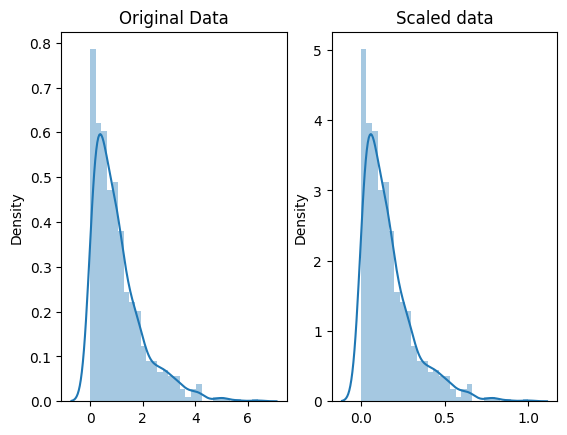

In [ ]:
# menghasilkan 1000 titik data yang diambil secara acak dari distribusi eksponensial
# masih pake library python
data = np.random.exponential(size=1000)

# mix-max skala data antara 0 dan 1
scaled_data = minmax_scaling(data, columns=[0])

# membandingkan data eksponensial dan scaled data
fig, ax = plt.subplots(1,2)
sns.distplot(data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

<ipython-input-34-1477dc138d59>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=ax[0])
<ipython-input-34-1477dc138d59>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalisasi_data[0], ax=ax[1])


Text(0.5, 1.0, 'Normalisasi Data')

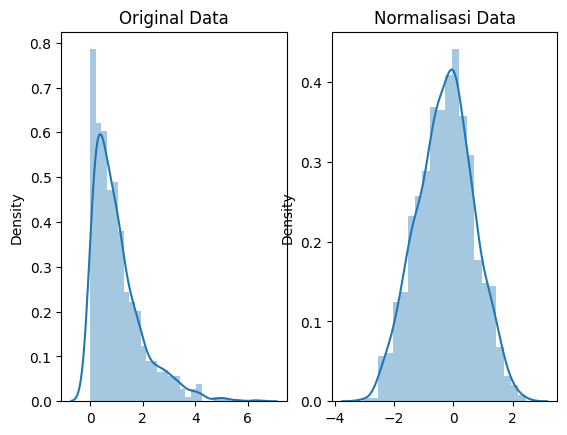

In [ ]:
# menormalisasi data pake min max atau z score

# menormalisasi data eksponensial dengan boxcox
normalisasi_data = stats.boxcox(data)

# membandingkan original data dan normalisasi data
fig, ax=plt.subplots(1,2)
sns.distplot(data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalisasi_data[0], ax=ax[1])
ax[1].set_title("Normalisasi Data")

# Data yg dipake untuk model

In [ ]:
# Hanya untuk case di Indonesia mengambil variabel utama nya
new_columns = ['Date','Province','Population','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
covid_data = data[new_columns]
#covid_data.tail()

# Visualisasi Parameter untuk Permodelan menggunakan subplot




In [ ]:
# grouping total kematian, recovered, active , total cases dari covid sampe sept 2022 (IN CASE INGIN MENGGUNAKAN TOTAL DARI MASING2 PARAMEETER NYA)
total_covid= covid_data.groupby('Date')[['Total Cases','Total Deaths','Total Recovered','Total Active Cases']].sum().reset_index().sort_values('Date', ascending=True).reset_index(drop=True)
total_covid.tail()
#grouping nya itu by total per hari dari seluruh provinsi

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases
925,2022-09-12,12786964,315669,12408267,63028
926,2022-09-13,12790051,315693,12412476,61882
927,2022-09-14,12794750,315720,12416777,62253
928,2022-09-15,12770491,314861,12392302,63328
929,2022-09-16,6405044,157876,6218708,28460


In [ ]:
# Perbandingan Kasus Covid di Indonesia dengan melakukan grouping (atau di totalkan untuk setiap variabel)
fig = go.Figure()
fig.add_trace(go.Scatter(x=total_covid['Date'],
                         y=total_covid['Total Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.add_trace(go.Scatter(x=total_covid['Date'],
                         y=total_covid['Total Active Cases'],
                         mode='lines',
                         name= 'Active Cases',
                         marker_color= 'red'
                         ))

fig.add_trace(go.Scatter(x=total_covid['Date'],
                         y=total_covid['Total Deaths'],
                         mode='lines',
                         name='Death Cases',
                         marker_color='black',
                         line=dict(dash='dot')
                        ))

fig.add_trace(go.Scatter(x=total_covid['Date'],
                         y=total_covid['Total Recovered'],
                         mode='lines',
                         name='Recovered Case',
                         marker_color='green'
                        ))

fig.update_layout(title='Perbandingan Total Kasus Covid di Indonesia dari 2020 sampai September 2022',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )
fig.show()

Text(0, 0.5, 'Jumlah Kasus Terkonfirmasi')

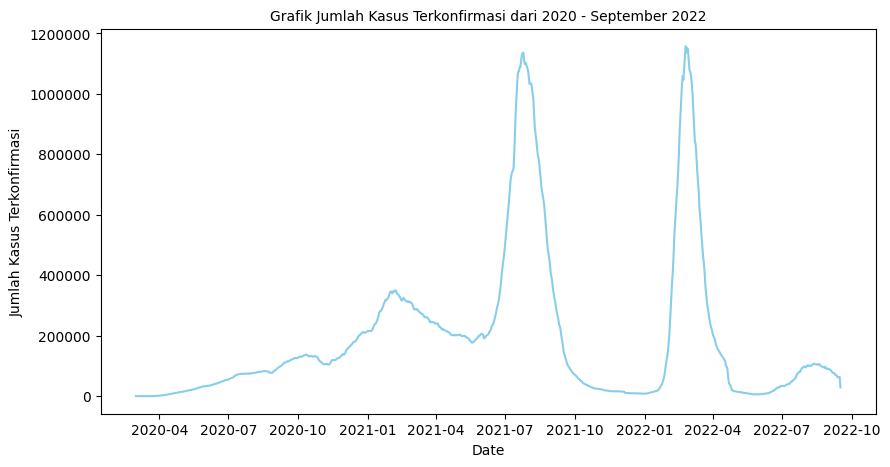

In [ ]:
# Kasus Baru itu termasuk new active case and new recovered cases

f, ax = plt.subplots(figsize=(10,5))
plt.ticklabel_format(style='plain')
sns.lineplot(x=total_covid["Date"], y=total_covid["Total Active Cases"].fillna(np.inf), color='skyblue')
ax.set_title('Grafik Jumlah Kasus Terkonfirmasi dari 2020 - September 2022', fontsize=10)
ax.set_ylabel(ylabel='Jumlah Kasus Terkonfirmasi', fontsize=10)

Text(0, 0.5, 'Total Active Cases')

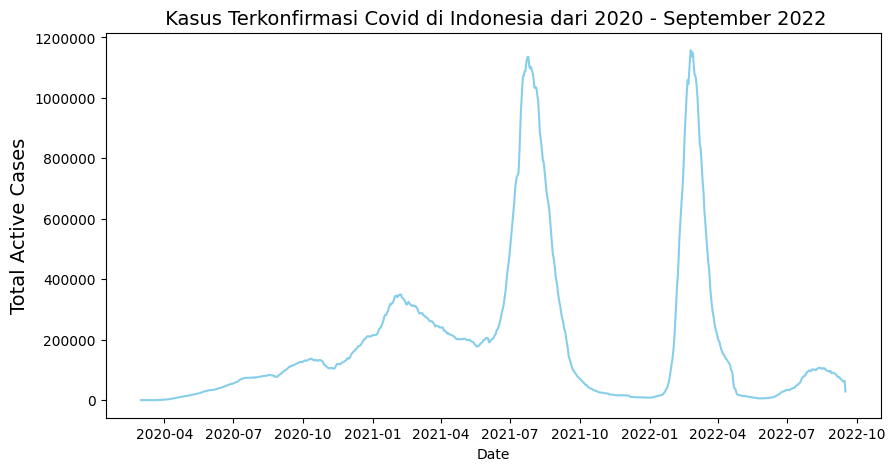

In [ ]:
# Kasus New active Cases hanya kasus covid yg baru terkonfirmasi

f, ax = plt.subplots(figsize=(10,5))
plt.ticklabel_format(style='plain')
sns.lineplot(x=total_covid["Date"], y=total_covid["Total Active Cases"].fillna(np.inf), color='skyblue')
ax.set_title(' Kasus Terkonfirmasi Covid di Indonesia dari 2020 - September 2022', fontsize=14)
ax.set_ylabel(ylabel='Total Active Cases', fontsize=14)

<ipython-input-18-215260ae98c2>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



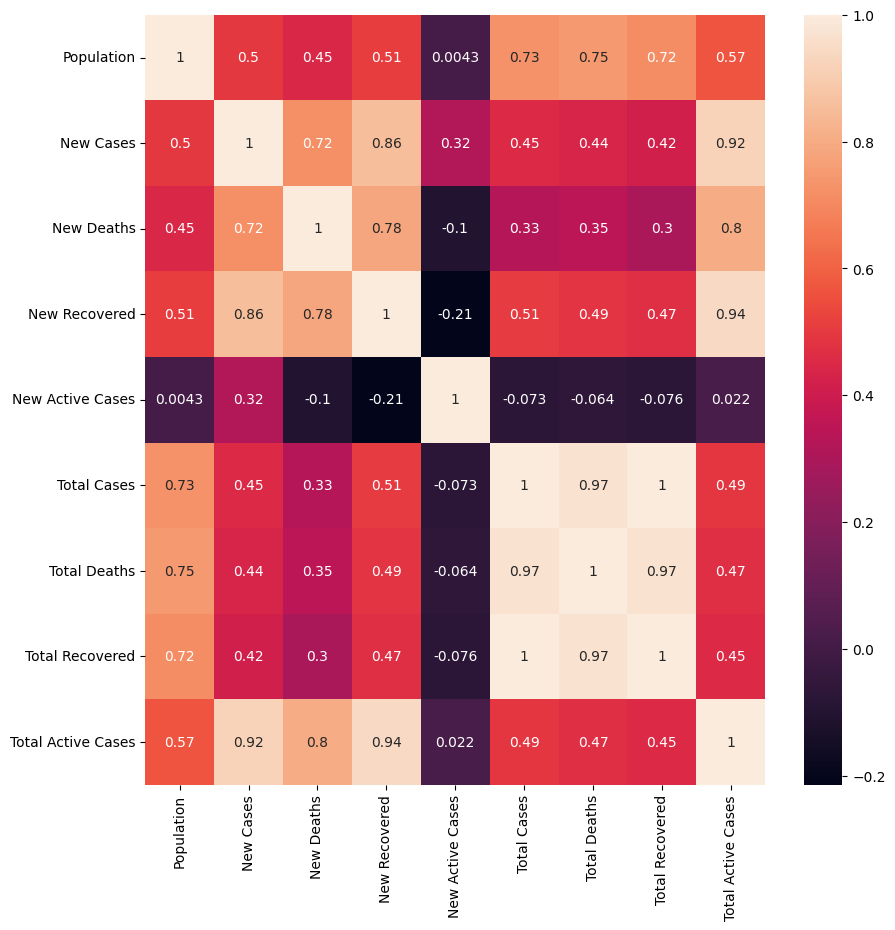

In [ ]:
#feature extraction/selection -> mencari hubungan / korelasi dari tiap2 variabel/ parameter
plt.figure(figsize=(10,10))
sns.heatmap(covid_data.corr(), annot=True)
plt.show()

# Trend

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#total_covid.set_index('Date', inplace=True)
activecases = total_covid[['Total Active Cases']].copy()
#newactivecases.plot(figsize=(20,10), linewidth=3, fontsize=20)
#plt.xlabel ('Date', fontsize=20)

decompose_result_mult = seasonal_decompose(activecases, model="additive", period=365) #periode itu adalah cycle nya/ pattern nya mau di define bagaimana

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

#decompose_result_mult.plot()
#trend.plot()



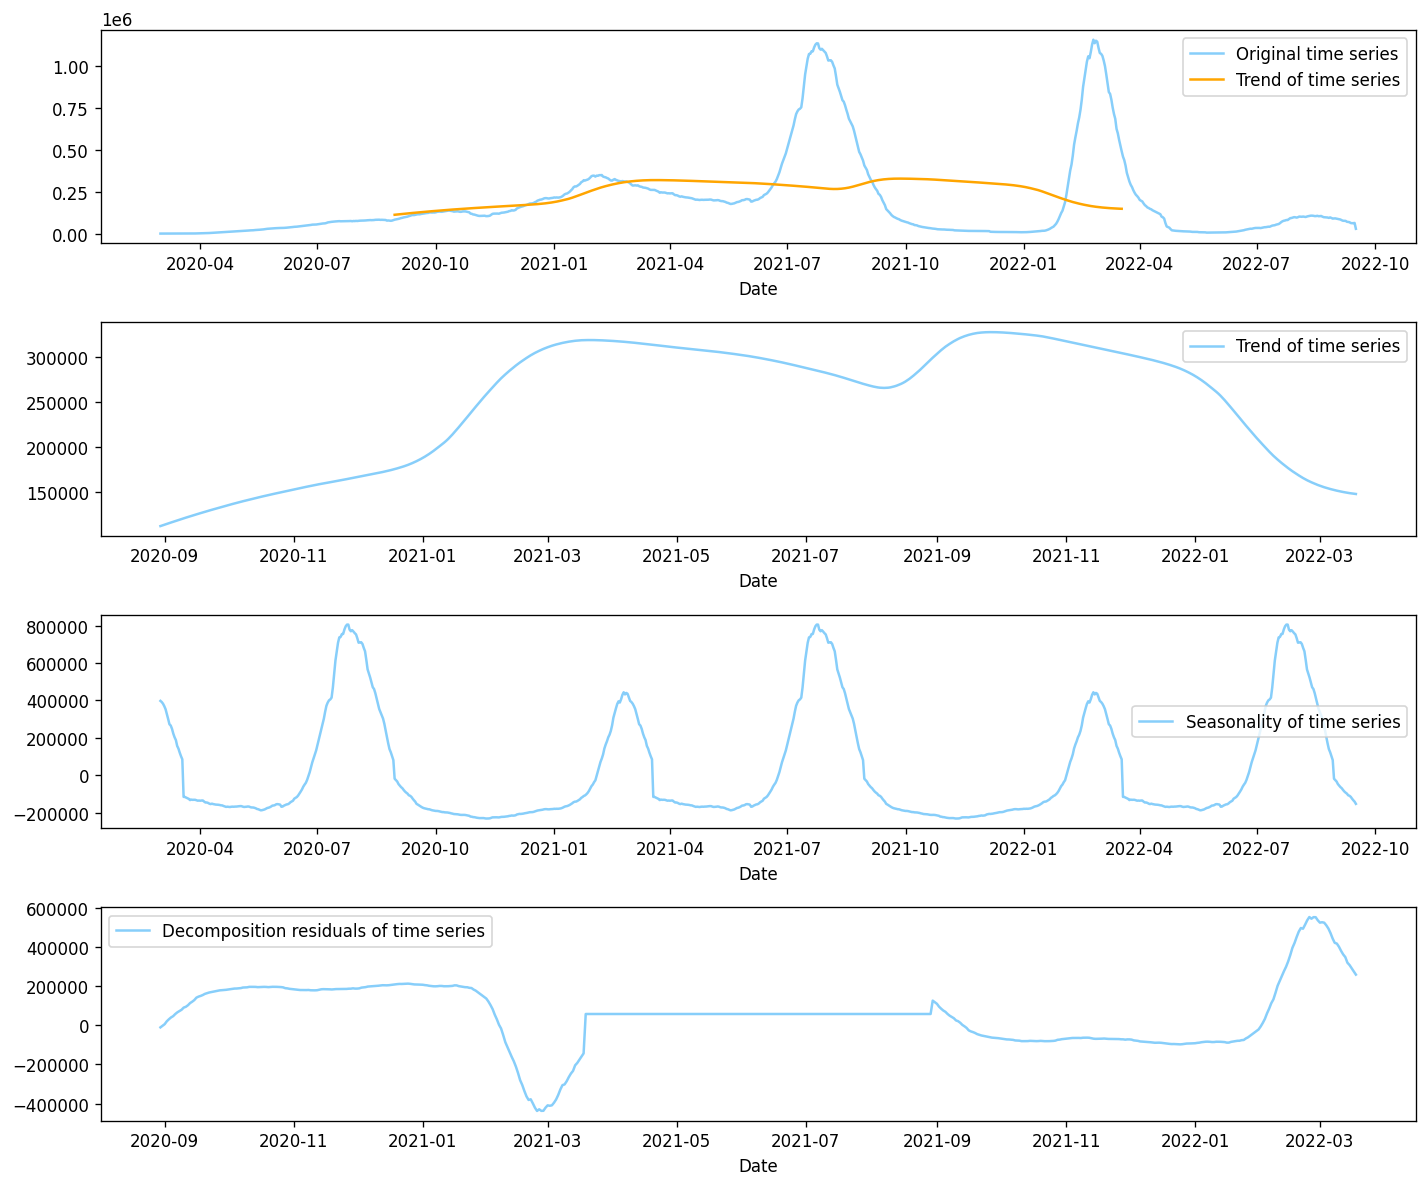

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(activecases,label='Original time series', color='lightskyblue')
plt.plot(trend,label='Trend of time series',color='orange')
plt.xlabel ('Date')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend of time series',color='lightskyblue')
plt.legend(loc='best')
plt.xlabel ('Date')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality of time series',color='lightskyblue')
plt.legend(loc='best')
plt.xlabel ('Date')
plt.subplot(414)
plt.plot(residual,label='Decomposition residuals of time series',color='lightskyblue')
plt.legend(loc='best')
plt.xlabel ('Date')
plt.tight_layout()


In [ ]:
#covid_data.insert(1, 'Hari Ke', range(0,0 + len(covid_data)))
covid_data.head()

# data tes



In [ ]:
new_columns = ['Date','Total Active Cases']
data_tes = total_covid[new_columns]
#data_tes.reset_index(inplace=True)

In [ ]:
#data_tes = covid_data[new_columns]
#data_tes.insert(0,'Day Count', range(0,0 + len(data_tes)))

In [ ]:
#data_tes.reset_index(inplace=True)
data_tes['Date'] = pd.to_datetime(data_tes['Date'])
data_tes.tail()

<ipython-input-21-98eb756c8149>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Total Active Cases
925,2022-09-12,63028
926,2022-09-13,61882
927,2022-09-14,62253
928,2022-09-15,63328
929,2022-09-16,28460


In [ ]:
#data_tes= np.array(range(229))
#data_tes= data_tes.reshape(-1,1)


In [ ]:
#format date nya diganti
#covid_data['Date'] = pd.to_datetime(covid_data['Date'])
#covid_data.tail()

In [ ]:
#covid_data.set_index('Date', inplace=True)
#covid_data.tail()

# Mulai Prediksi Dan Split Data

In [ ]:
#mulai split data, coba ambil satu variabel dulu
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

x = data_tes.drop(['Date','New Active Cases'],axis = 1)
y = data_tes['New Active Cases']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.30) #data uji = 25%
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22275, 1)
(9547, 1)
(22275,)
(9547,)


In [ ]:
#hanya bisa di run sekali krn ini di reshape bentuk array nya
y_train= y_train.values.reshape(-1,1)
x_train= x_train.values.reshape(-1,1)

In [ ]:
#hanya bisa di run sekali
y_test= y_test.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)

In [ ]:
#x_train.shape

In [ ]:
#y_train.shape

(23866, 1)

In [ ]:
#Scalling the Data, supaya nominal angka data bisa seragam (tidak terlalu besar Range-nya)from sklearn.preprocessing import StandardScaler
# harus reset index dulu karena ketika mau di scale, data frame tidak bisa baca timestamp. jadi harus diubah jadi index
pipeline = Pipeline([
   ('std_scalar', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

# Mulai ARIMA MODEL

# Uji stasioner untuk arima

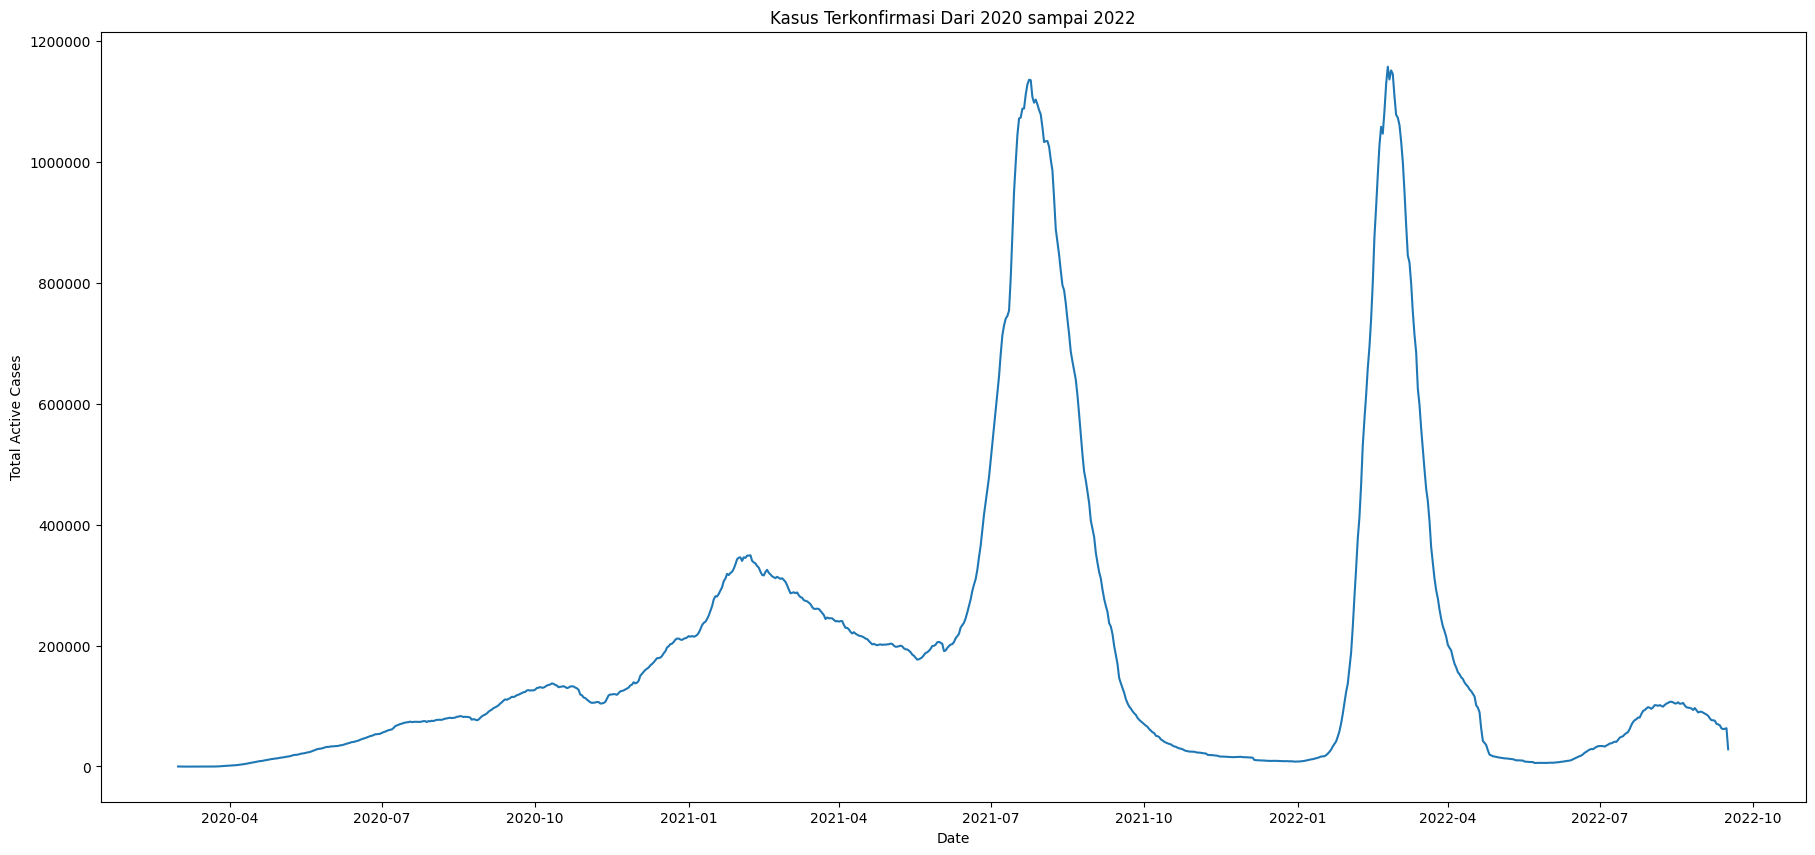

In [ ]:
plt.figure(figsize=(22,10))
plt.ticklabel_format(style='plain')
plt.plot(data_tes["Date"], data_tes["Total Active Cases"])
plt.title("Kasus Terkonfirmasi Dari 2020 sampai 2022")
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.show()

In [ ]:
# Set timeseries data for total active cases
timeSeries = data_tes.loc[:, ["Date","Total Active Cases"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


In [ ]:
#Uji stasioner Dickey_adfuller

from statsmodels.tsa.stattools import adfuller
result = adfuller(ts,  autolag='AIC')

output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    output['Critical Value (%s)'%key] = value

print(output)

#seharusnya ini tidak stasioner . why? 1. karena tidak konstan
#Null Hypothesis: The data is not stationary.
#Alternative Hypothesis: The data is stationary.
#For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:
#p-value <= significance level (0.01, 0.05, 0.10, etc.)
#If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

Test Statistic                  -3.056102
p-value                          0.029977
#Lags Used                      19.000000
Number of Observations Used    910.000000
Critical Value (1%)             -3.437556
Critical Value (5%)             -2.864721
Critical Value (10%)            -2.568464
dtype: float64


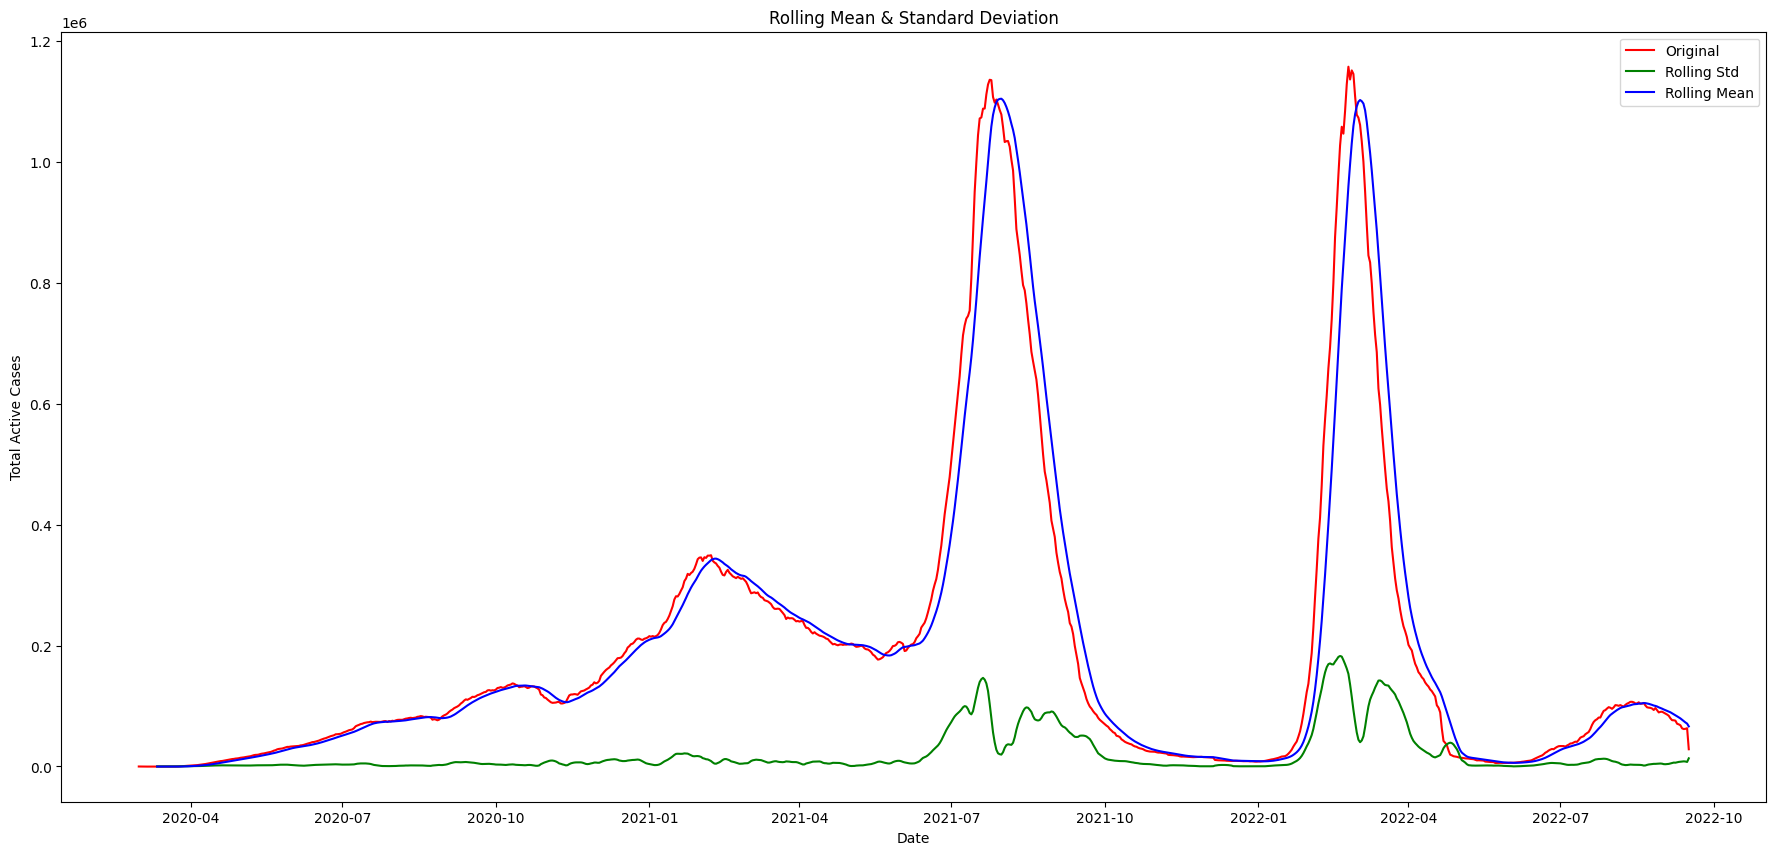

In [ ]:

# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()
    plt.figure(figsize=(22,10))
    orig = plt.plot(ts, color='red',label='Original')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
    plt.xlabel("Date")
    plt.ylabel("Total Active Cases")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
check_mean_std(ts)


# Data not stasionary / SARIMA

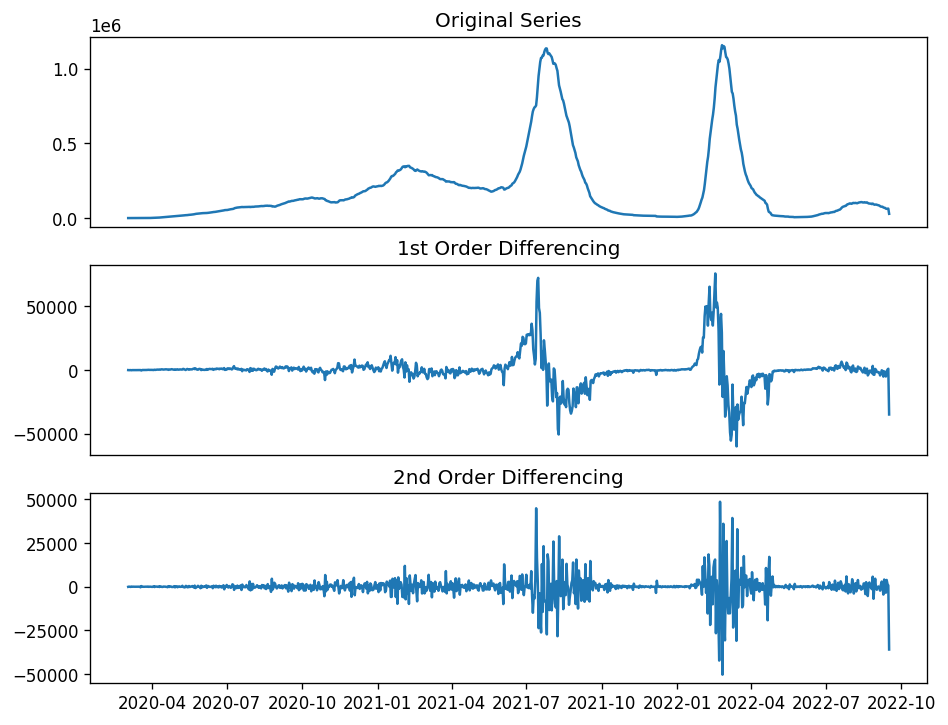

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

#find value d

# Original Series
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.plot(ts); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(ts.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(ts.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


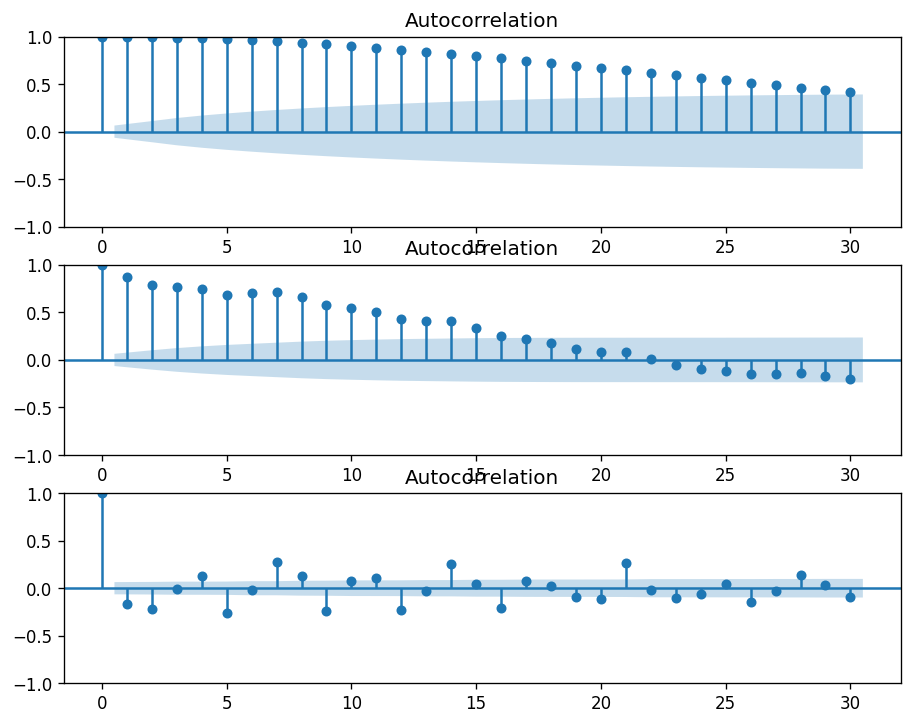

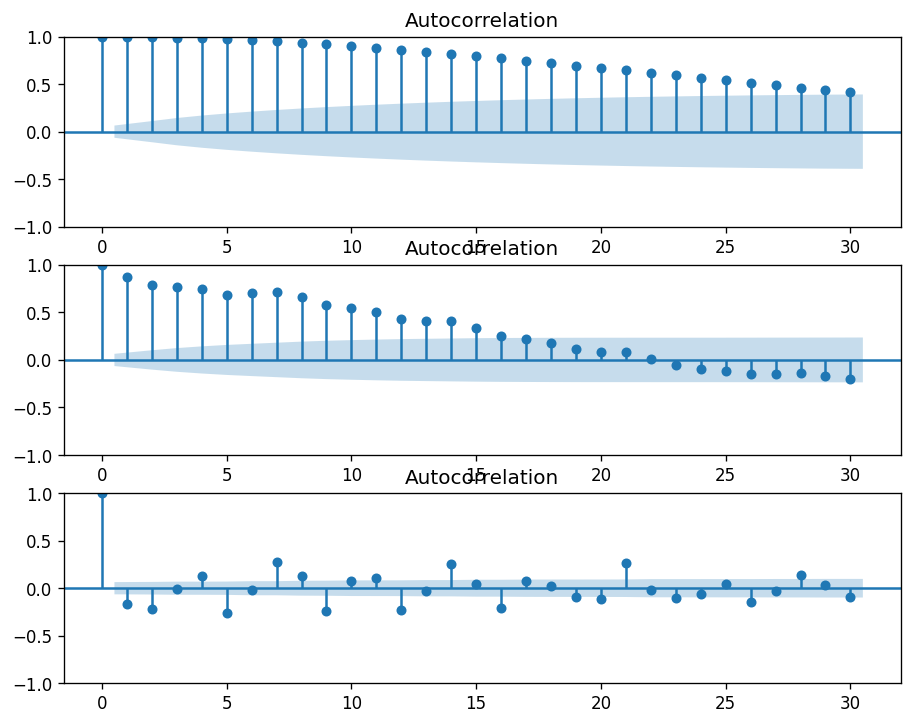

In [ ]:
#finding the d value
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(ts, ax=ax1)
plot_acf(ts.diff().dropna(), ax=ax2)
plot_acf(ts.diff().diff().dropna(), ax=ax3)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



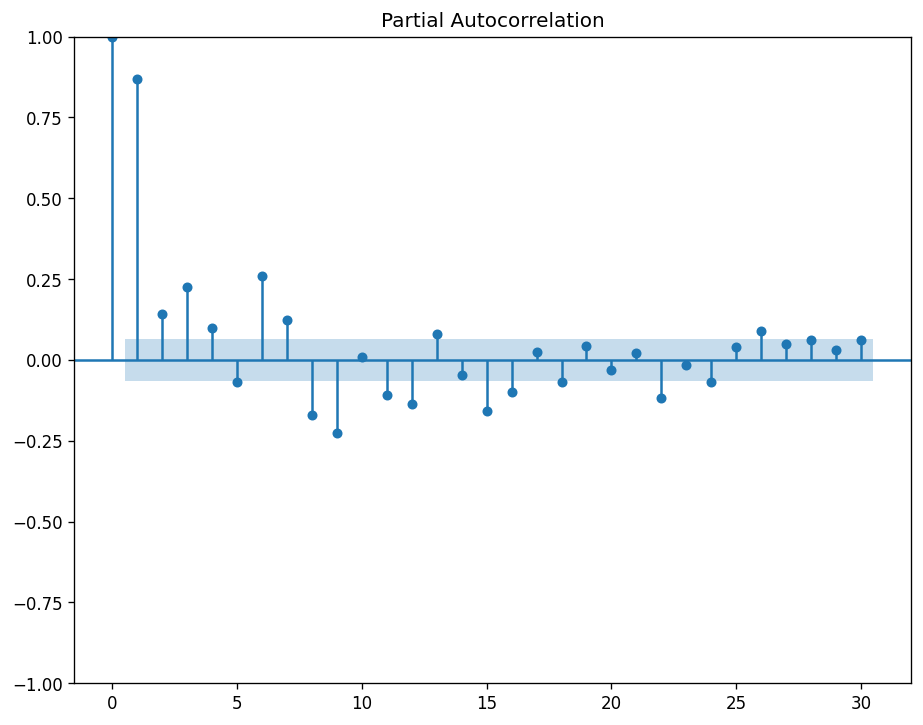

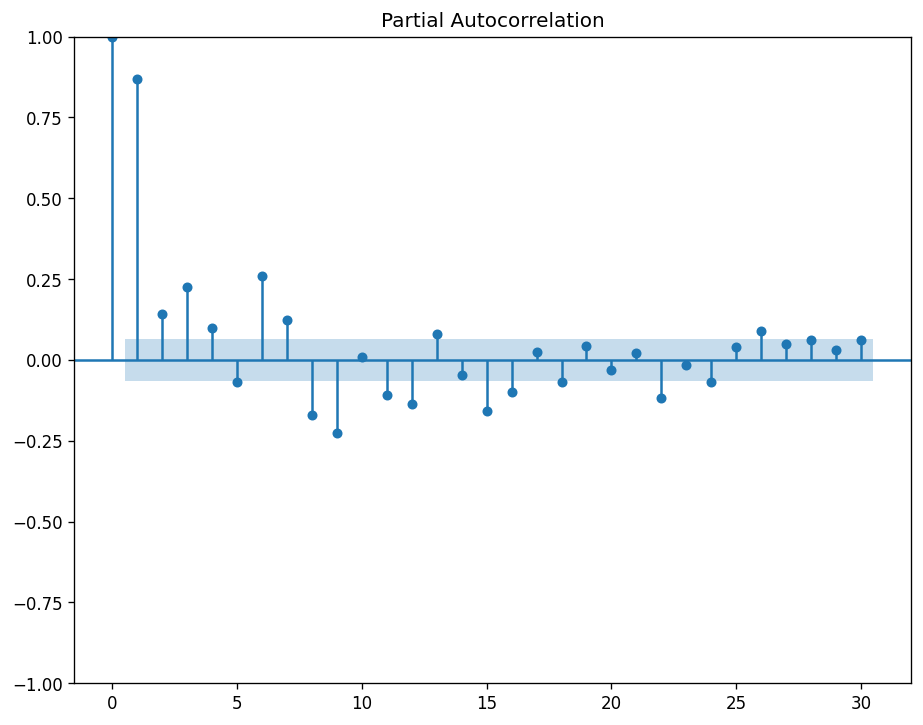

In [ ]:
#finding the p value
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts.diff().dropna())

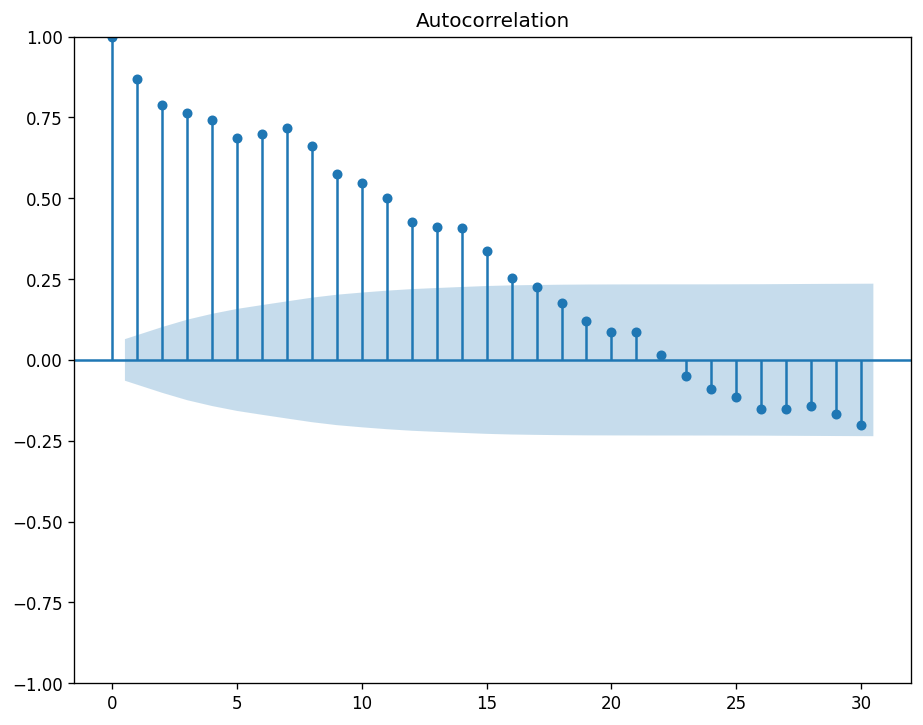

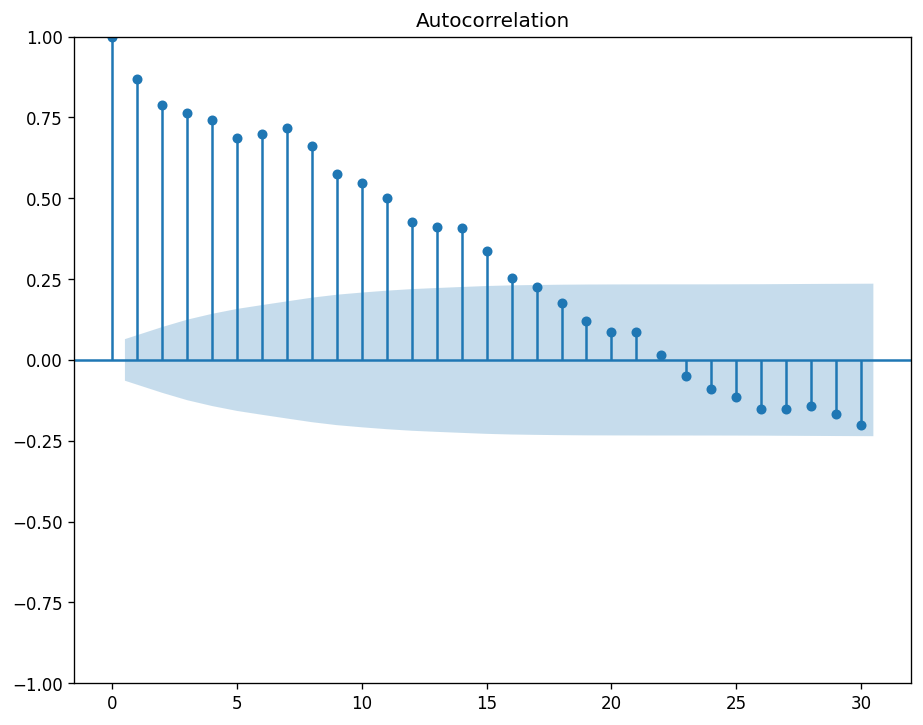

In [ ]:
#finding value q
plot_acf(ts.diff().dropna())

# Make Data stasionary /  Building ARIMA

In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

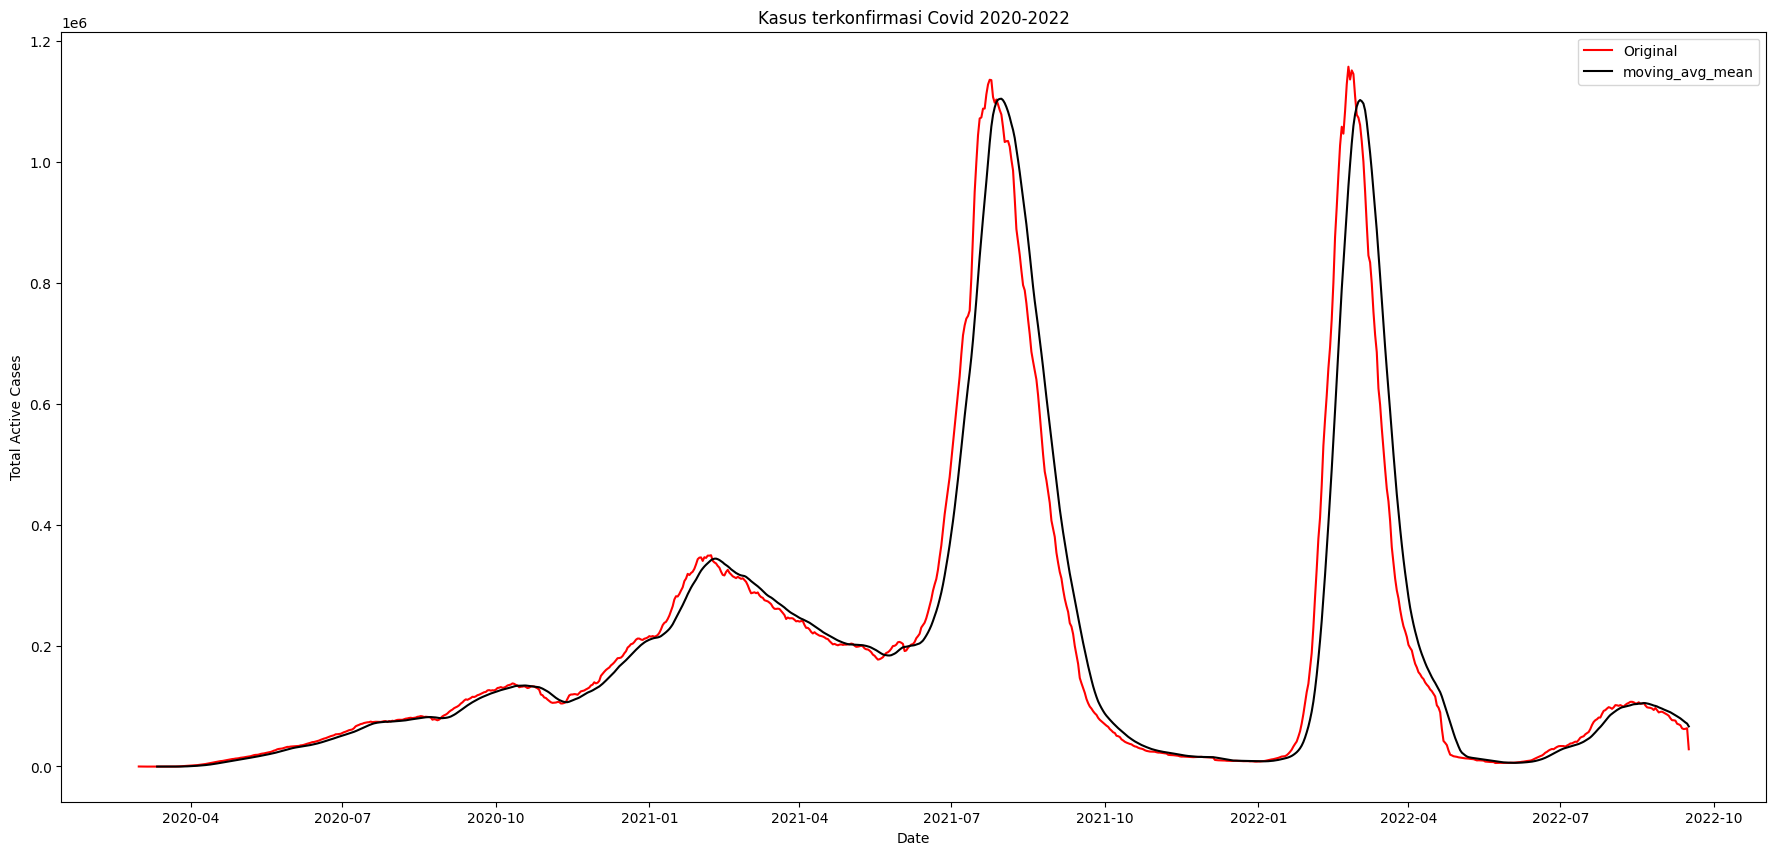

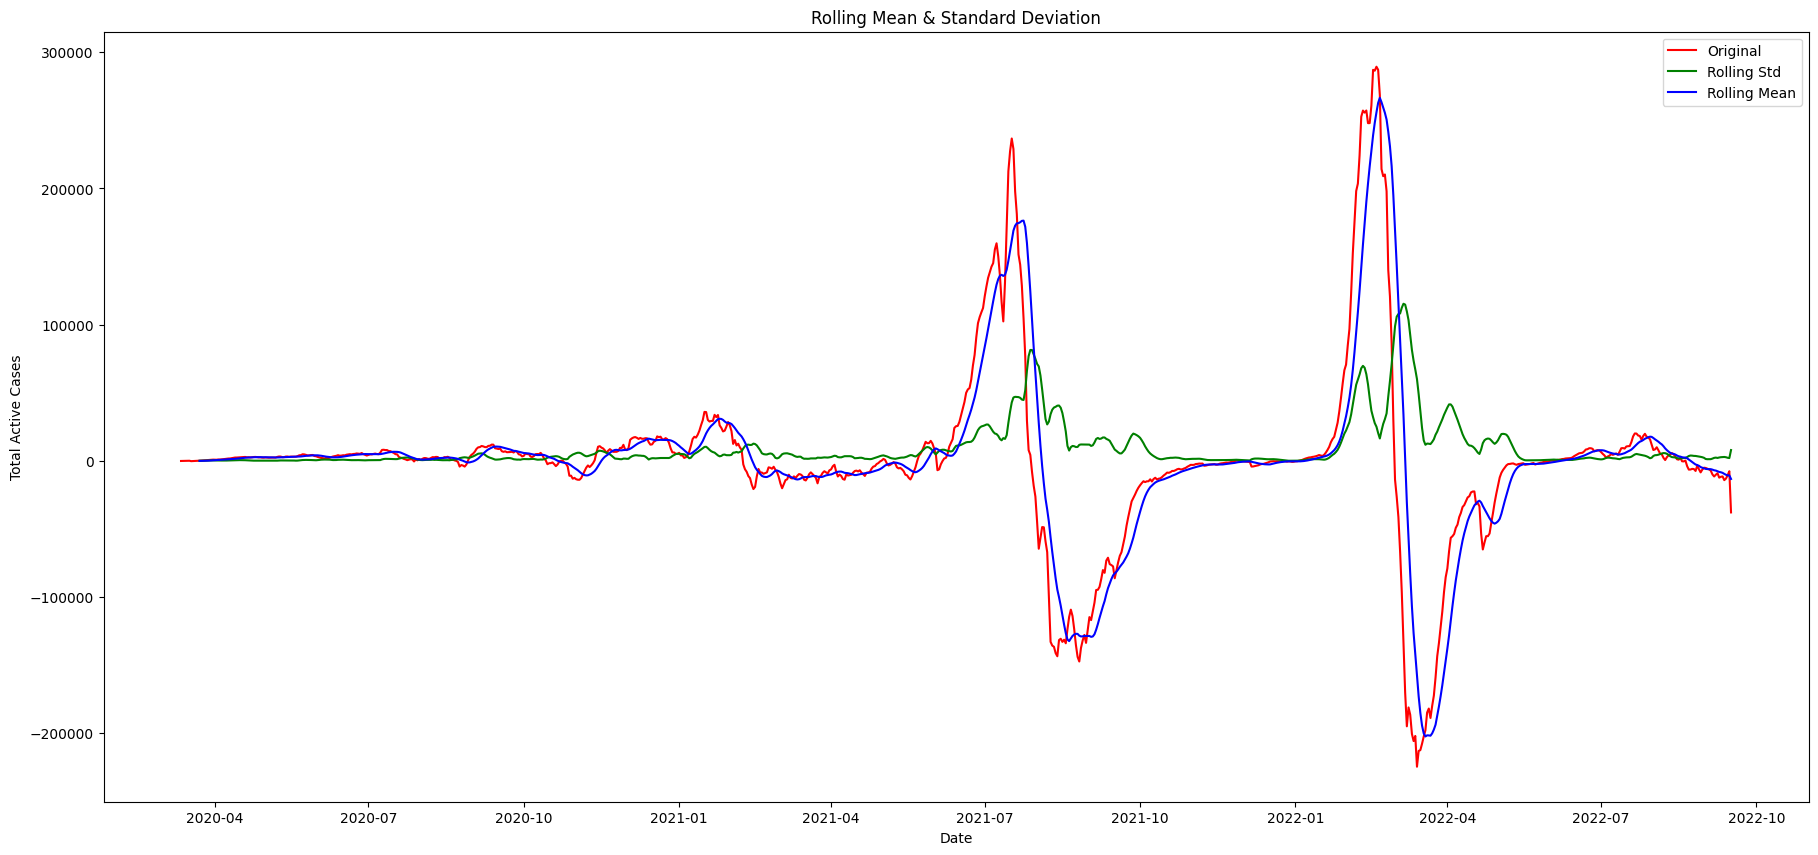

In [ ]:
# Moving average method
moving_avg = ts.rolling(12).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Kasus terkonfirmasi Covid 2020-2022")
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.legend()
plt.show()

ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) #

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)

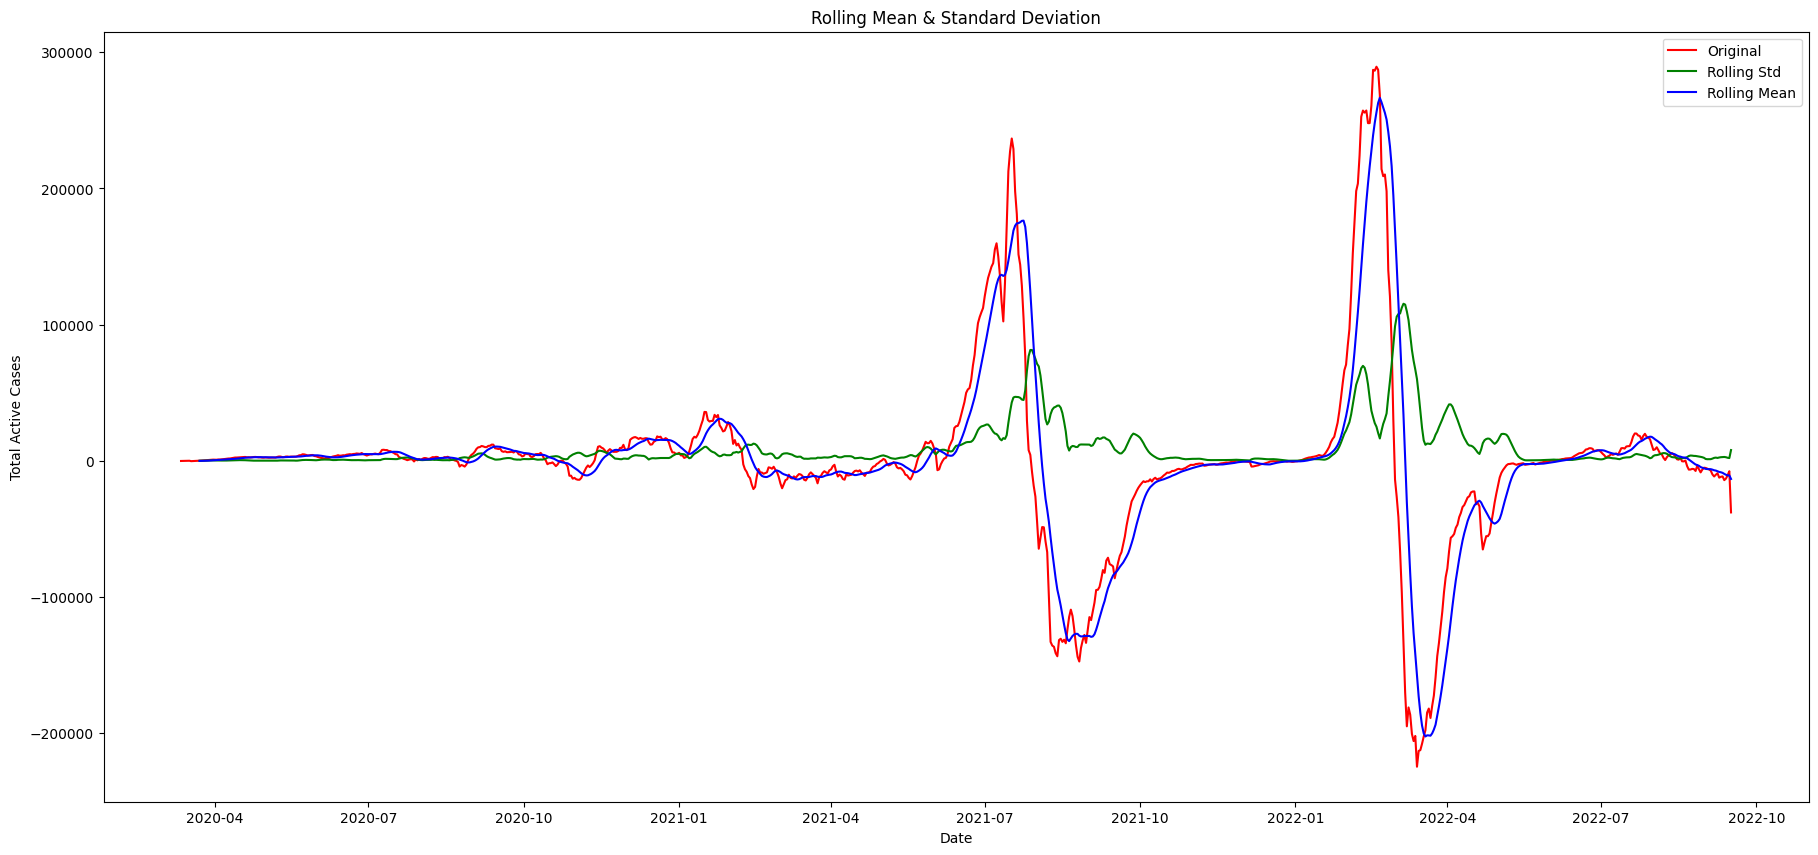

In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)


In [ ]:
#Menggunakan Dickey_adfuller

from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_moving_avg_diff,  autolag='AIC')

dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

#sudah stasioner  krn critical value > test statistic


Test Statistic                  -5.510224
p-value                          0.000002
#Lags Used                      18.000000
Number of Observations Used    900.000000
Critical Value (1%)             -3.437637
Critical Value (5%)             -2.864757
Critical Value (10%)            -2.568483
dtype: float64


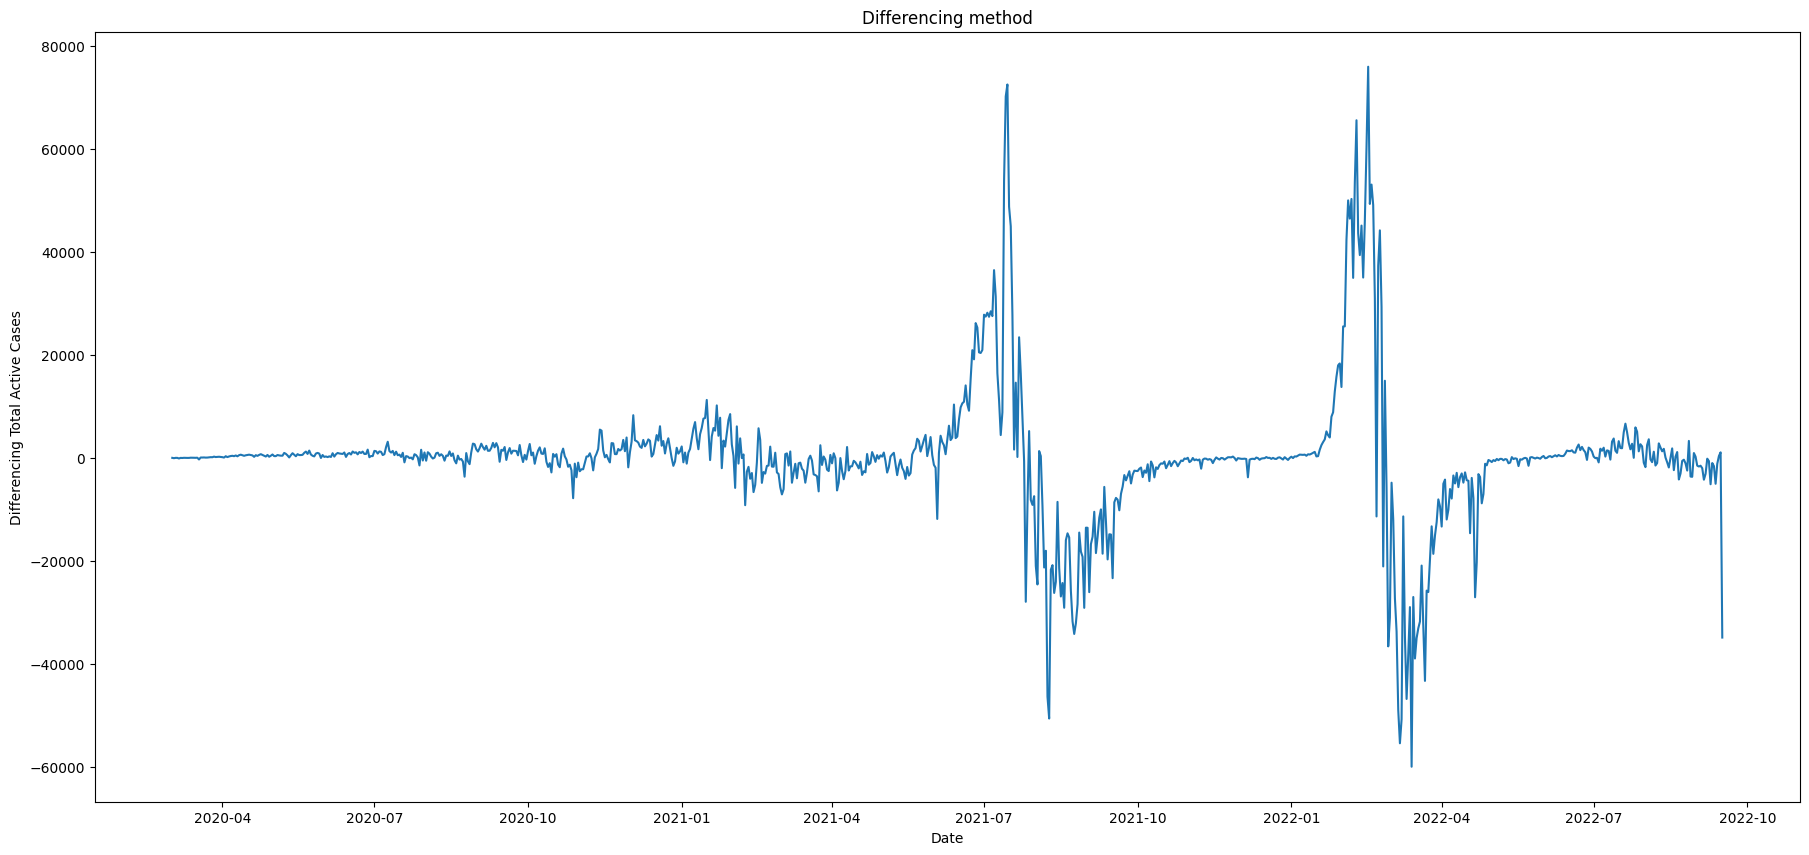

In [ ]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Total Active Cases")
plt.show()

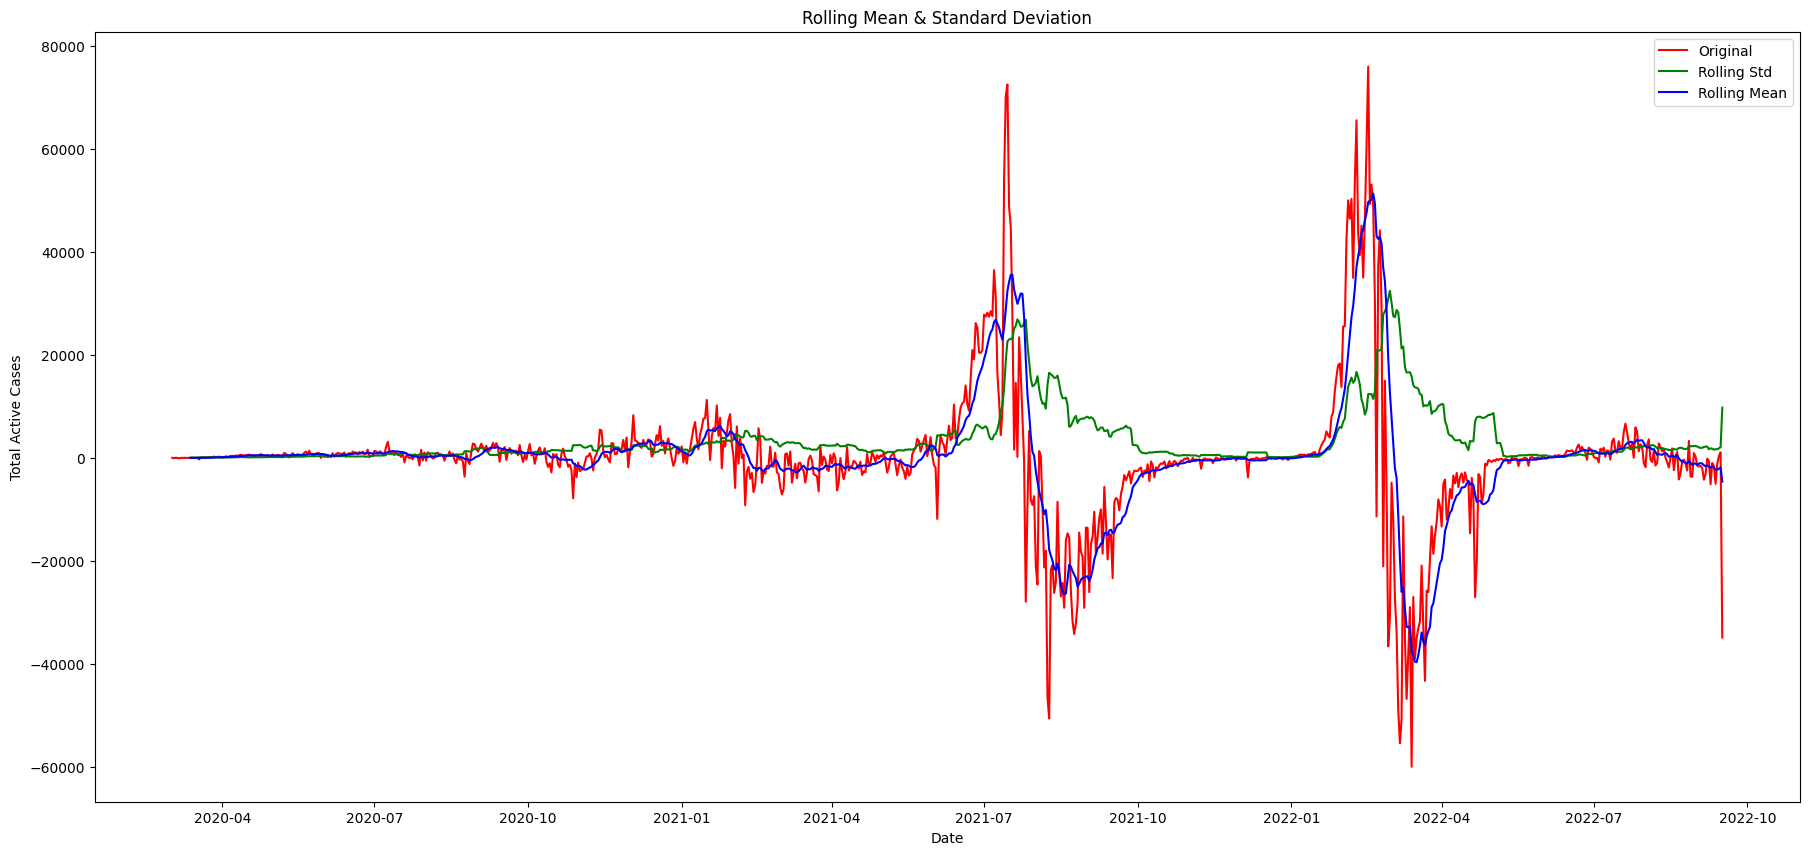

In [ ]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)

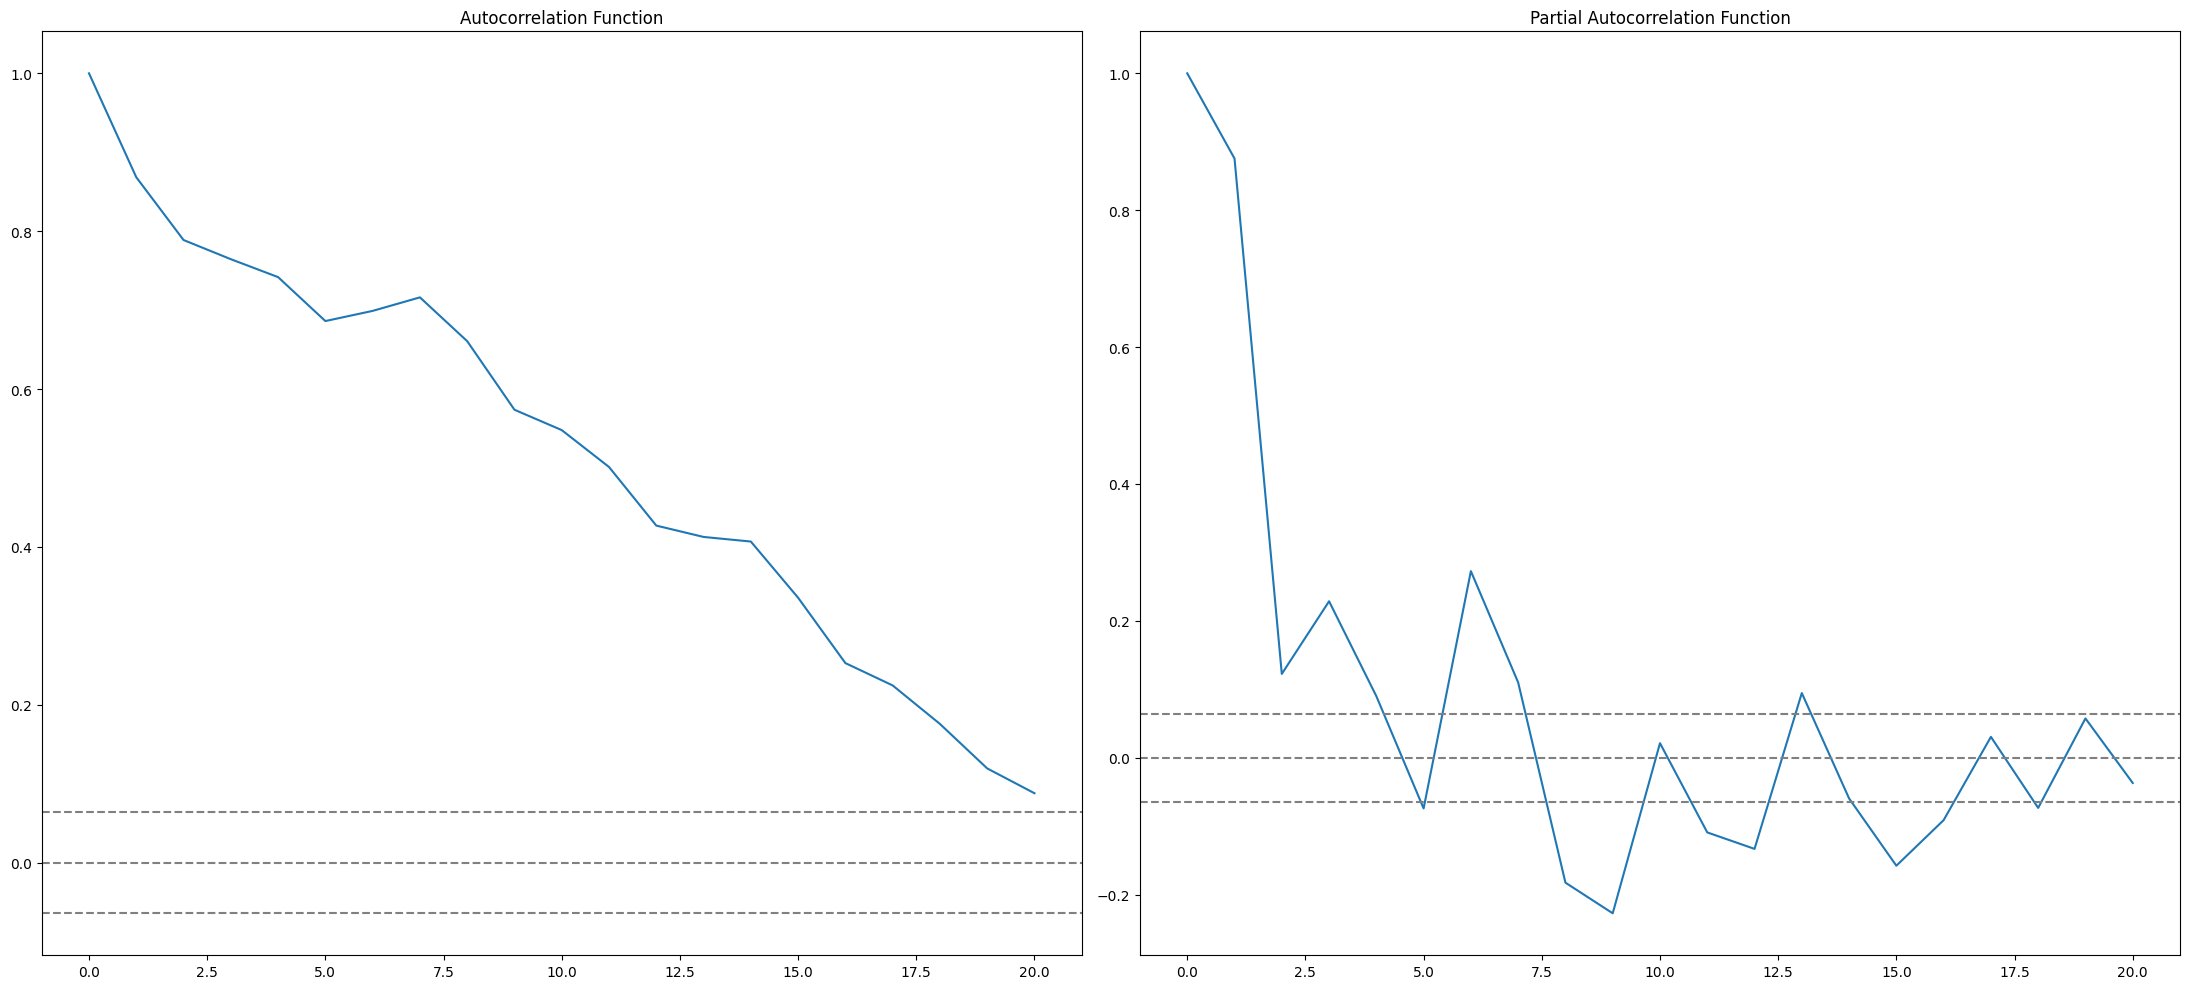

In [ ]:
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# PREDIKSI 120 HARI KE DEPAN

In [ ]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
import statsmodels.api  as sm
import warnings
warnings.filterwarnings("ignore")

# fit model
model = sm.tsa.arima.ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,1,1) => (d,p,q)
model_fit = model.fit()
forecast = model_fit.predict()


In [ ]:
forecast.tail()

2022-09-12    66550.111699
2022-09-13    59309.853534
2022-09-14    60095.279128
2022-09-15    61999.544559
2022-09-16    63963.278475
Freq: D, Name: predicted_mean, dtype: float64

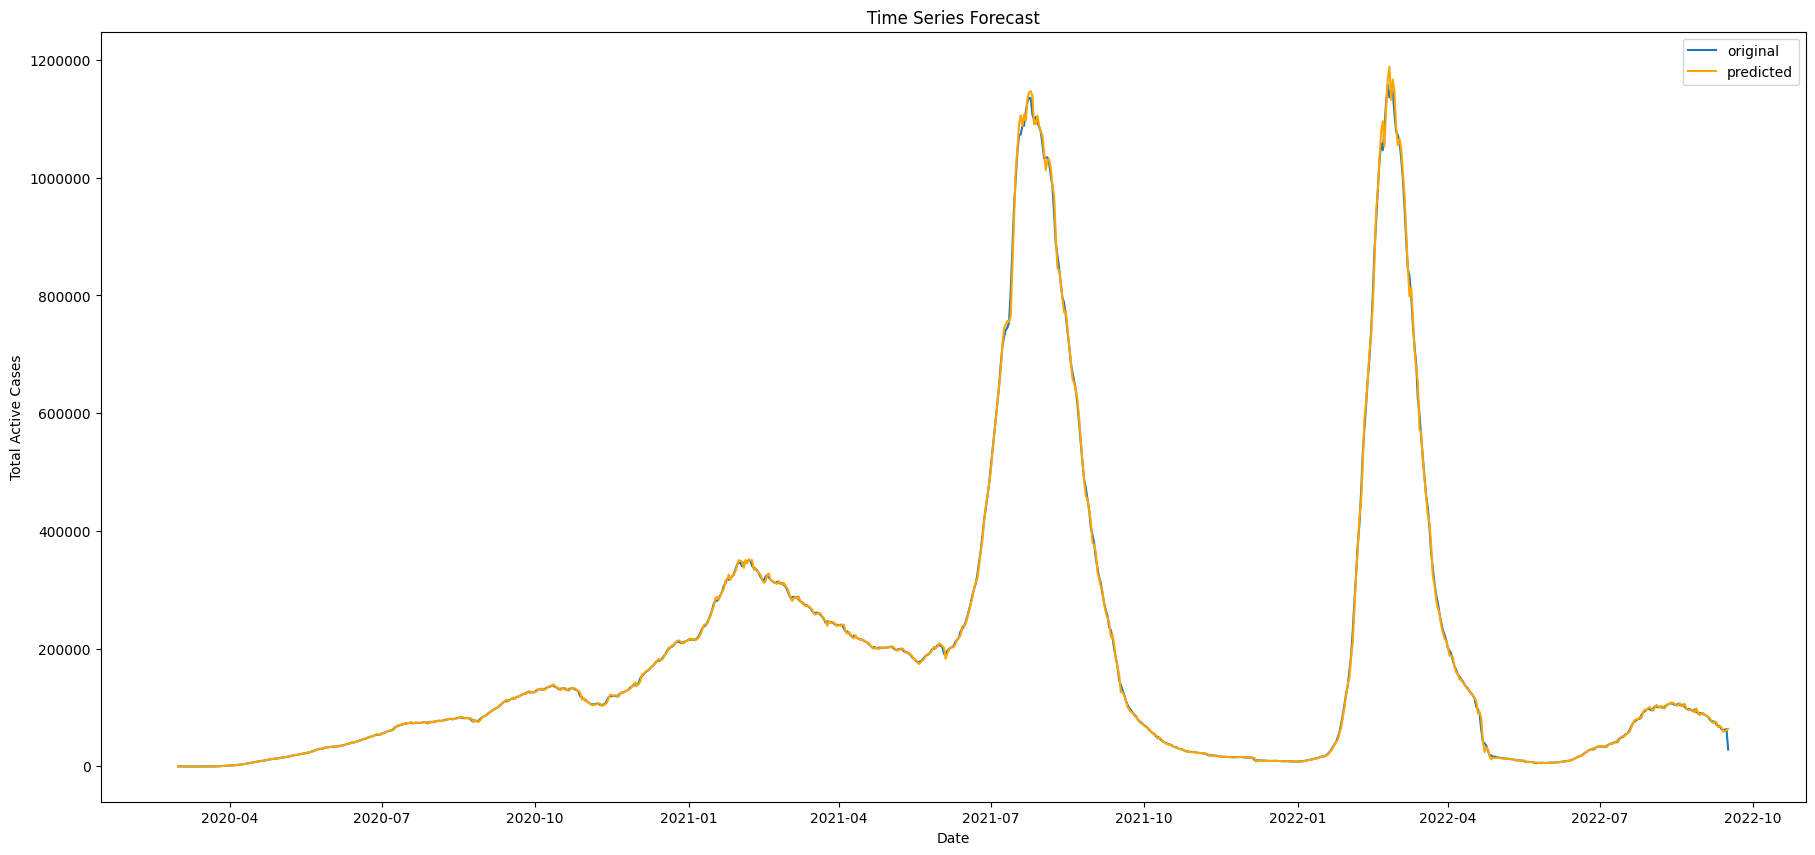

In [ ]:
# visualization predicted
plt.figure(figsize=(22,10))
plt.ticklabel_format(style='plain')
plt.plot(data_tes["Date"], data_tes["Total Active Cases"],label = "original")
plt.plot(forecast,label = "predicted", color = 'orange')
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.legend()
plt.show()


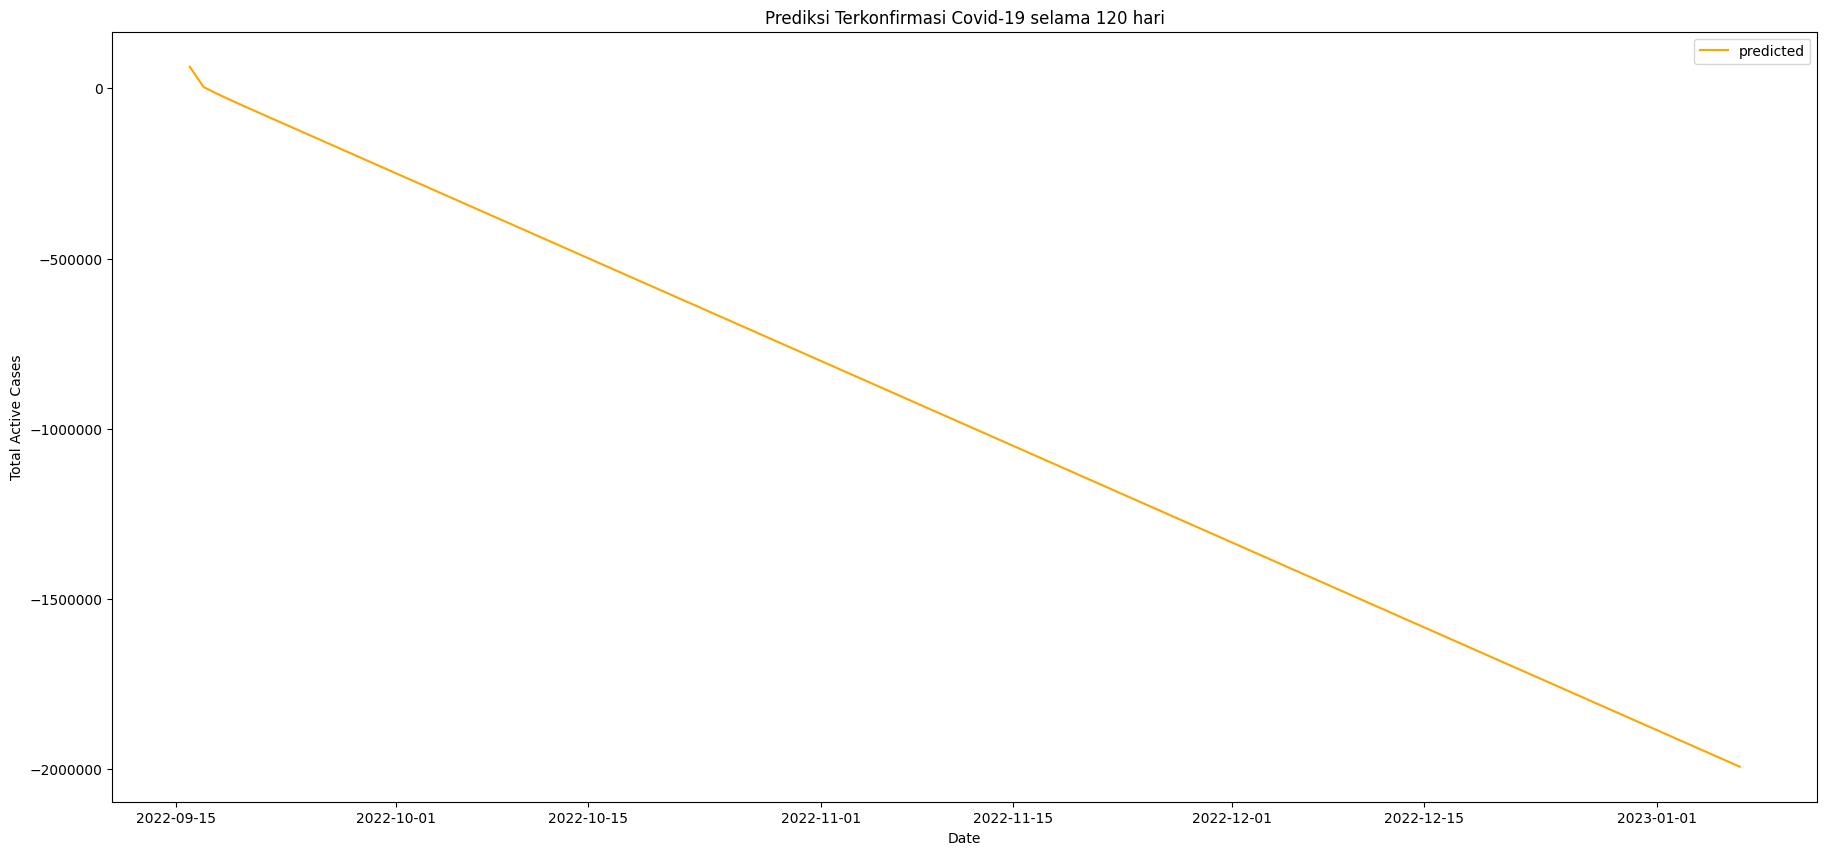

In [ ]:
# visualization predicted
plt.figure(figsize=(22,10))
plt.ticklabel_format(style='plain')
#plt.plot(data_tes["Date"], data_tes["Total Active Cases"],label = "original")
plt.plot(forecast,label = "predicted", color = 'orange')
plt.title("Prediksi Terkonfirmasi Covid-19 selama 120 hari")
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.legend()
plt.show()

In [ ]:
from pandas import Series;
from numpy.random import randn
df = pd.DataFrame({'Actual': ts['Total Active Cases'], 'Predicted': forecast})
df.tail(10)

,Actual,Predicted
2022-09-07,76394,73687.284663
2022-09-08,75767,75485.744927
2022-09-09,70650,74767.970948
2022-09-10,69648,66669.465701
2022-09-11,68054,68152.787928
2022-09-12,63028,66303.685108
2022-09-13,61882,58958.939533
2022-09-14,62253,60191.944469
2022-09-15,63328,61778.378347
2022-09-16,28460,63601.722772


# Prediksi 60 hari kedepan

In [ ]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
import statsmodels.api  as sm
import warnings
warnings.filterwarnings("ignore")

# fit model
model = sm.tsa.arima.ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1) => (d,p,q)
model_fit = model.fit()

# predict 60 hari ke depan
start_index = datetime(2022,9,16)
end_index = datetime(2022,10,15)
forecastday = model_fit.predict(start=start_index, end=end_index)


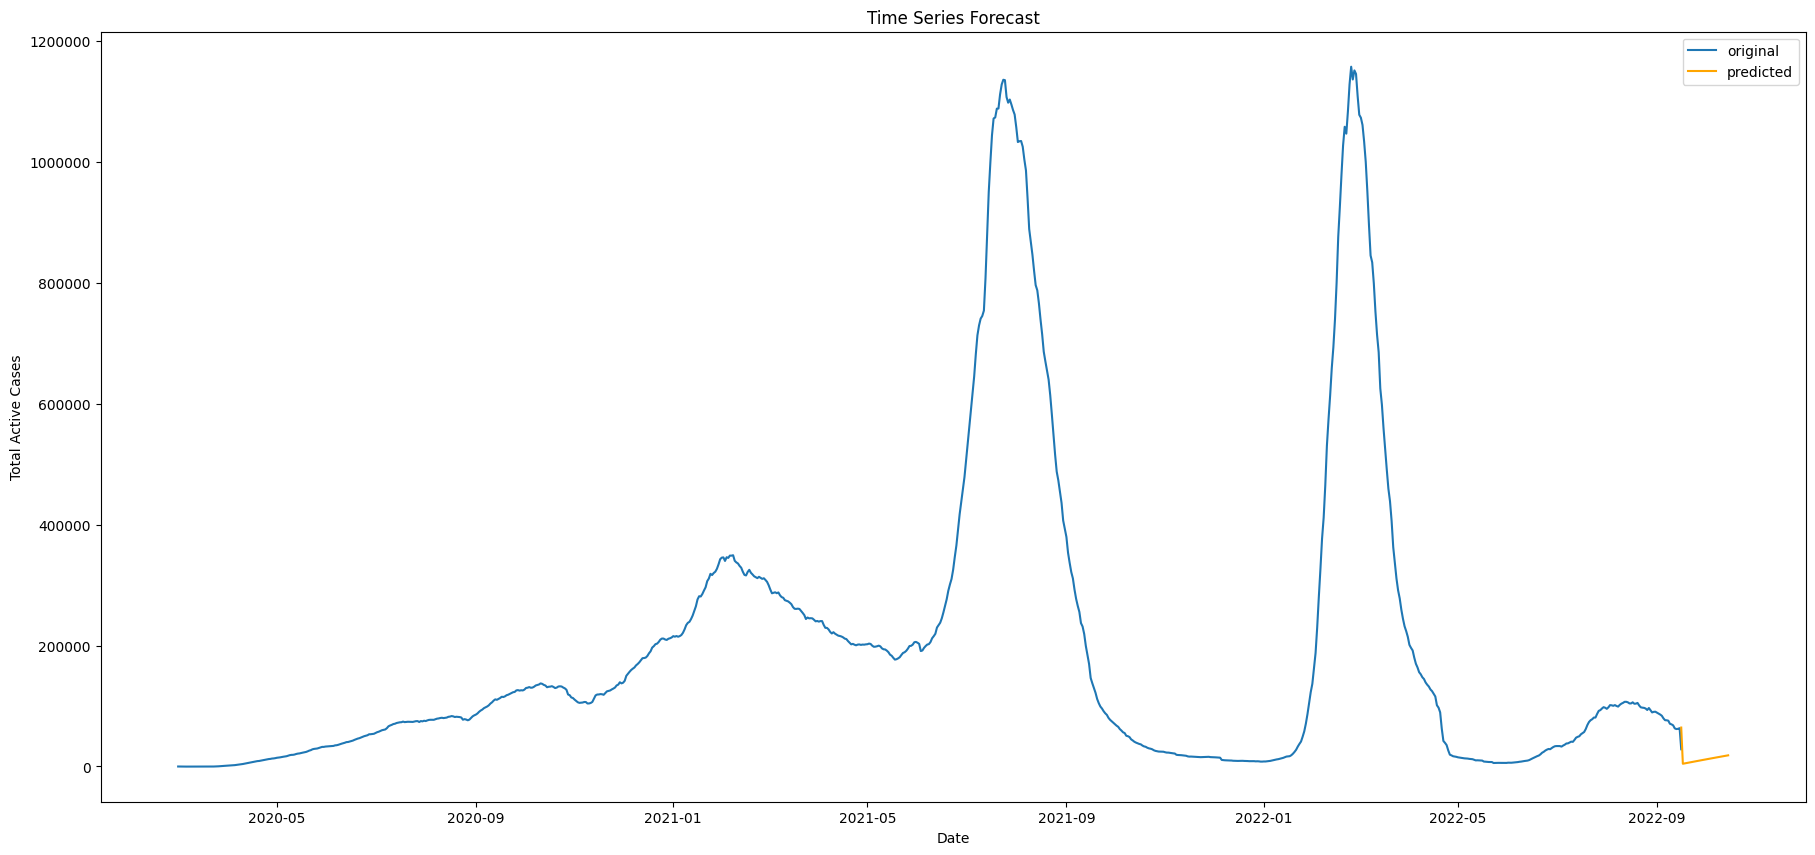

In [ ]:
# visualization predicted
plt.figure(figsize=(22,10))
plt.ticklabel_format(style='plain')
plt.plot(data_tes["Date"], data_tes["Total Active Cases"],label = "original")
plt.plot(forecastday,label = "predicted", color = 'orange')
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.legend()
plt.show()

In [ ]:
#Hasil Prediksi
from pandas import Series;
from numpy.random import randn
df = pd.DataFrame({'Predicted': forecastday})
df.head(10)

,Predicted
2022-09-16,64375.153244
2022-09-17,4489.207971
2022-09-18,5004.924761
2022-09-19,5519.226406
2022-09-20,6032.116788
2022-09-21,6543.599780
2022-09-22,7053.679244
2022-09-23,7562.359031
2022-09-24,8069.642981
2022-09-25,8575.534926


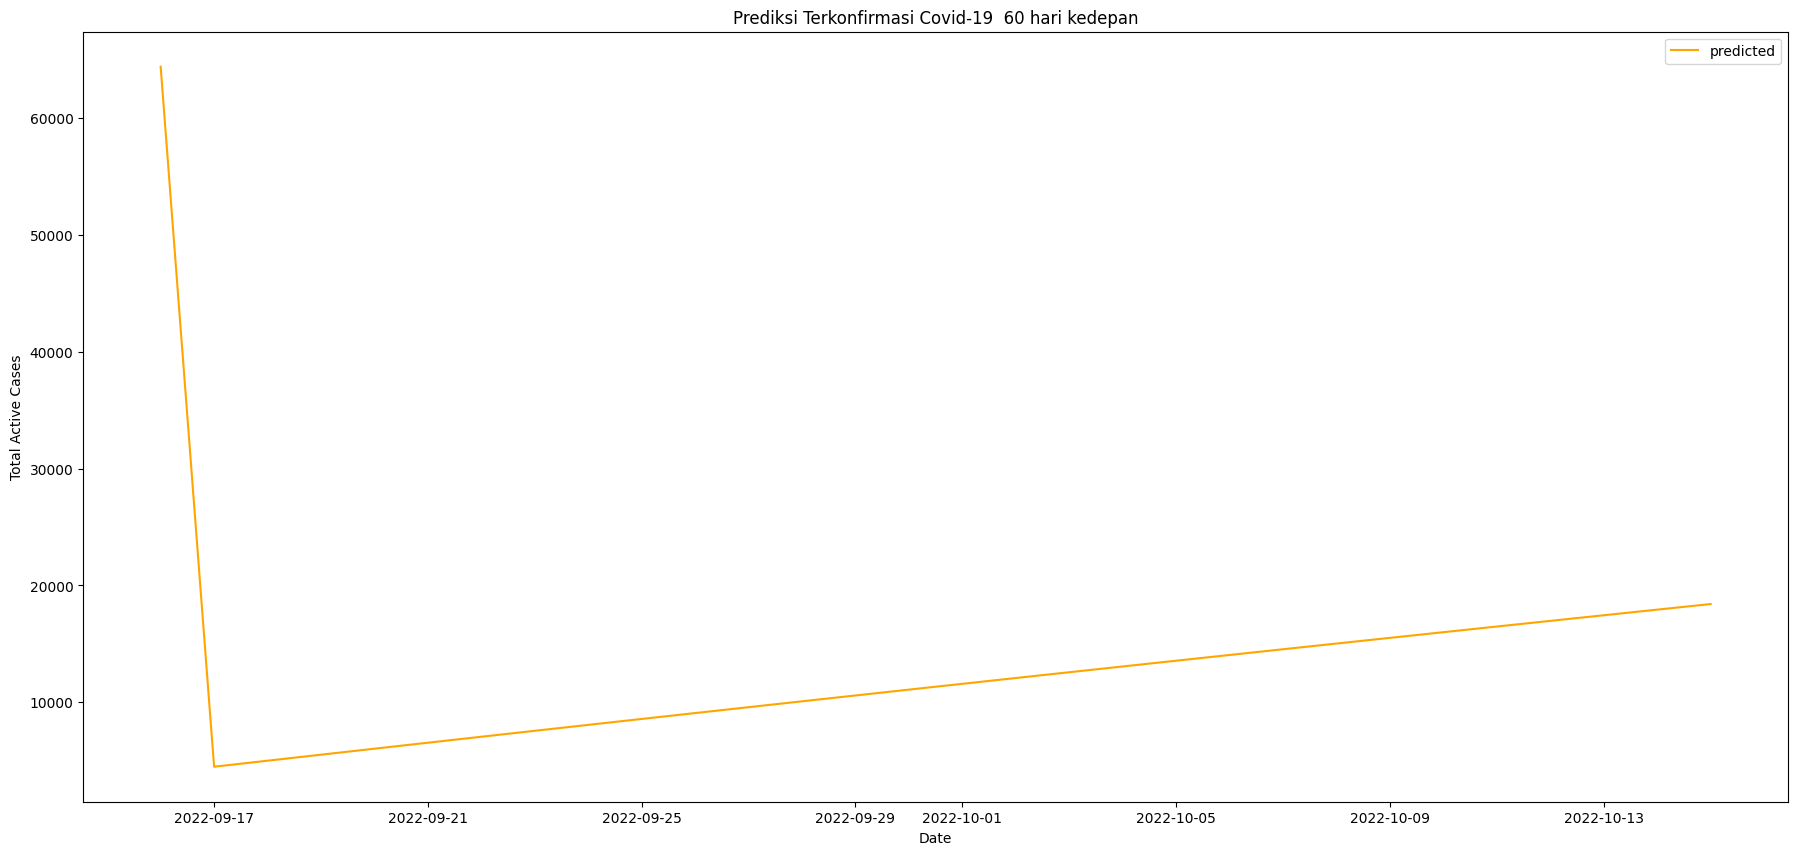

In [ ]:
# visualization predicted
plt.figure(figsize=(22,10))
plt.ticklabel_format(style='plain')
#plt.plot(data_tes["Date"], data_tes["Total Active Cases"],label = "original")
plt.plot(forecastday,label = "predicted", color = 'orange')
plt.title("Prediksi Terkonfirmasi Covid-19  60 hari kedepan")
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.legend()
plt.show()

# Permodelan dan evaluasi

In [ ]:
# predict all path
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# fit model
model2 = sm.tsa.arima.ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast = model_fit2.predict()


In [ ]:
#print evaluasi

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



print('Evaluation of train :\n_____________________________________')
print('\n R2 Square : ', round(r2_score(ts, forecast),4))
print('\n RMSE      : ',round(np.sqrt(mean_squared_error(ts, forecast)),4))
print('\n MAE       : ',round(mean_absolute_error(ts, forecast),4))
print('\n MSE       : ',round(mean_squared_error(ts, forecast),4))
#print('\n MAPE      : ',mean_squared_error(y_test, svr_test_pred))


Evaluation of train :
_____________________________________

 R2 Square :  0.9982

 RMSE      :  10847.1229

 MAE       :  4342.4141

 MSE       :  117660074.4383


In [ ]:
#df_svr = pd.DataFrame({'Real Values':y_test, 'Predicted Values':svr_test_pred})
from pandas import Series;
from numpy.random import randn
df = pd.DataFrame({'Actual': ts['Total Active Cases'], 'Predicted': forecast2})
df.tail(10)

,Actual,Predicted
2022-09-07,76394,73687.284663
2022-09-08,75767,75485.744927
2022-09-09,70650,74767.970948
2022-09-10,69648,66669.465701
2022-09-11,68054,68152.787928
2022-09-12,63028,66303.685108
2022-09-13,61882,58958.939533
2022-09-14,62253,60191.944469
2022-09-15,63328,61778.378347
2022-09-16,28460,63601.722772


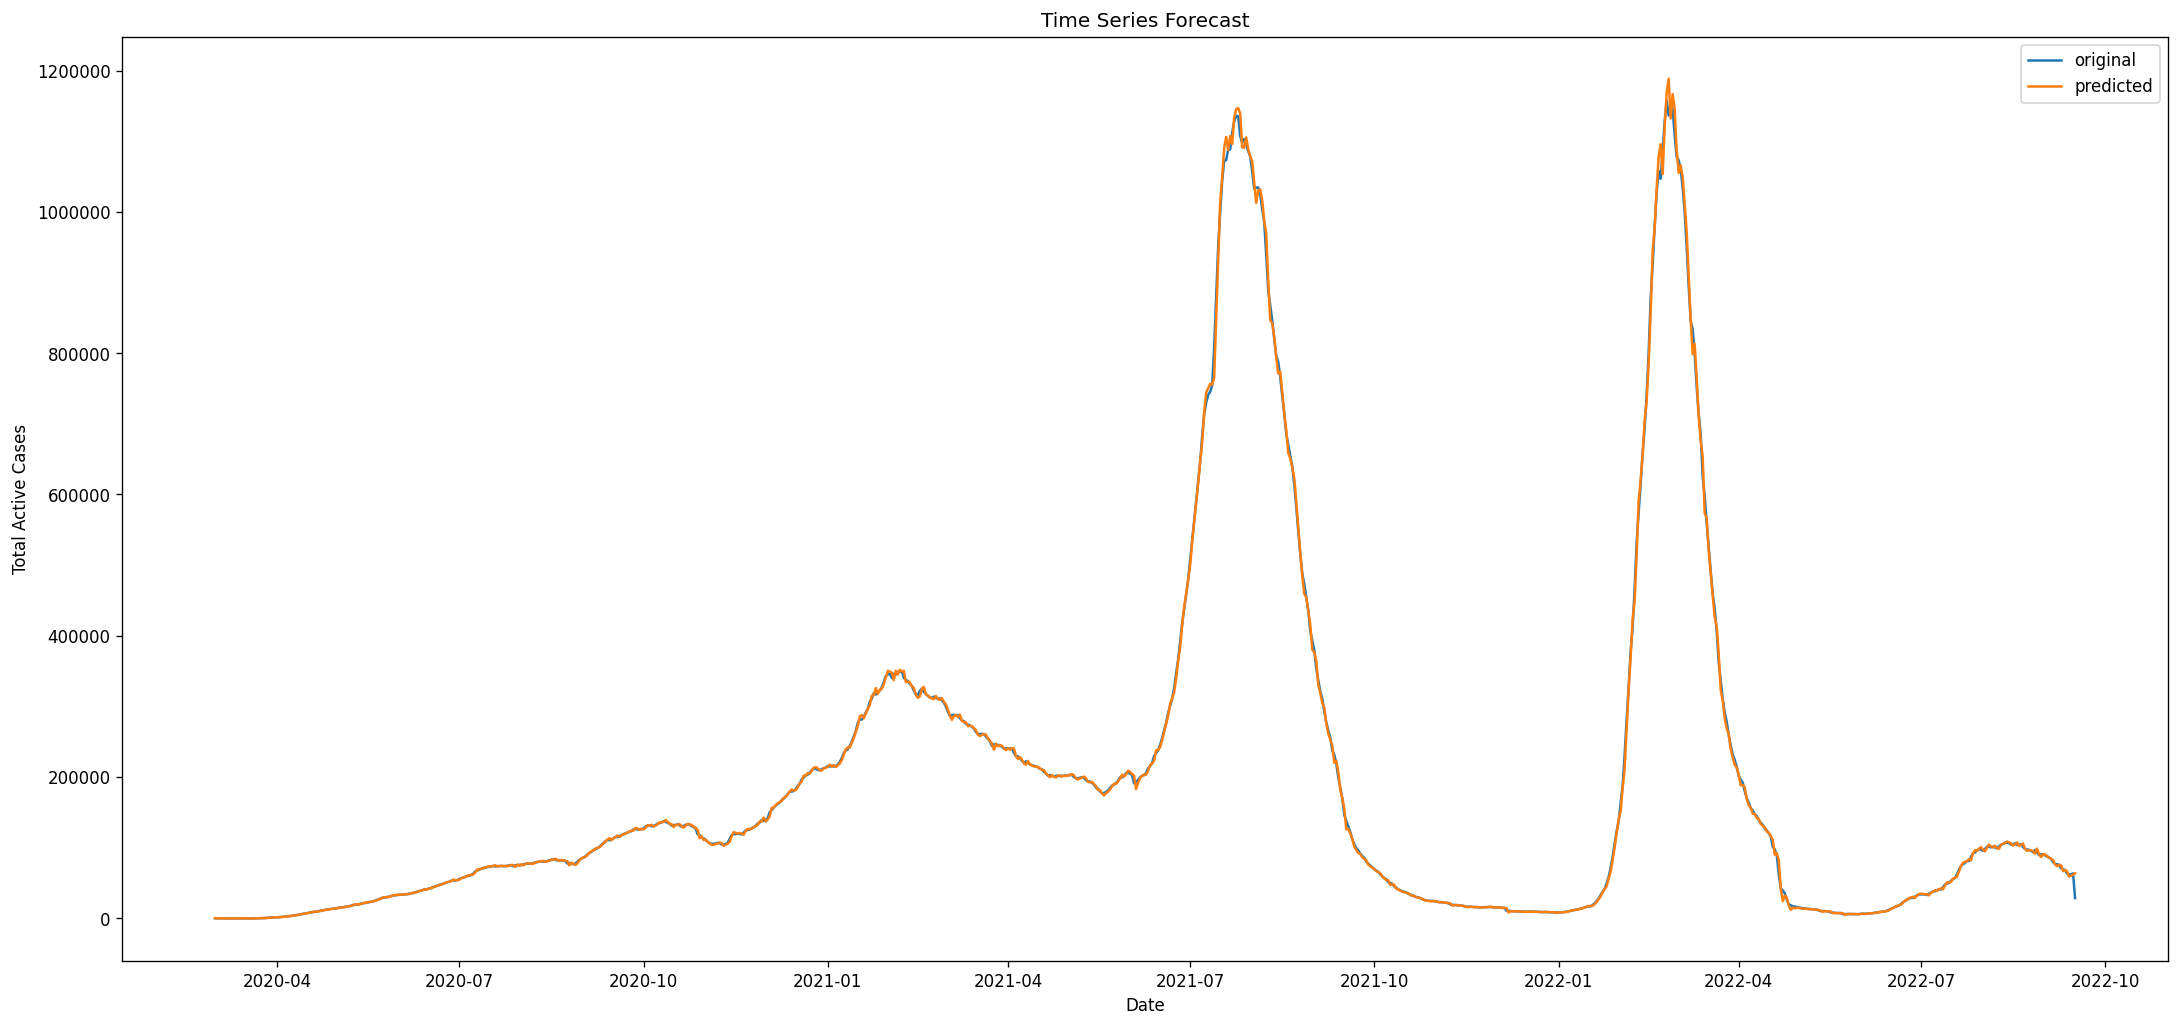

In [ ]:
# visualization perbandingan original dan predicted
plt.figure(figsize=(22,10))
plt.ticklabel_format(style='plain')
plt.plot(data_tes["Date"], data_tes["Total Active Cases"],label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.legend()
plt.show()

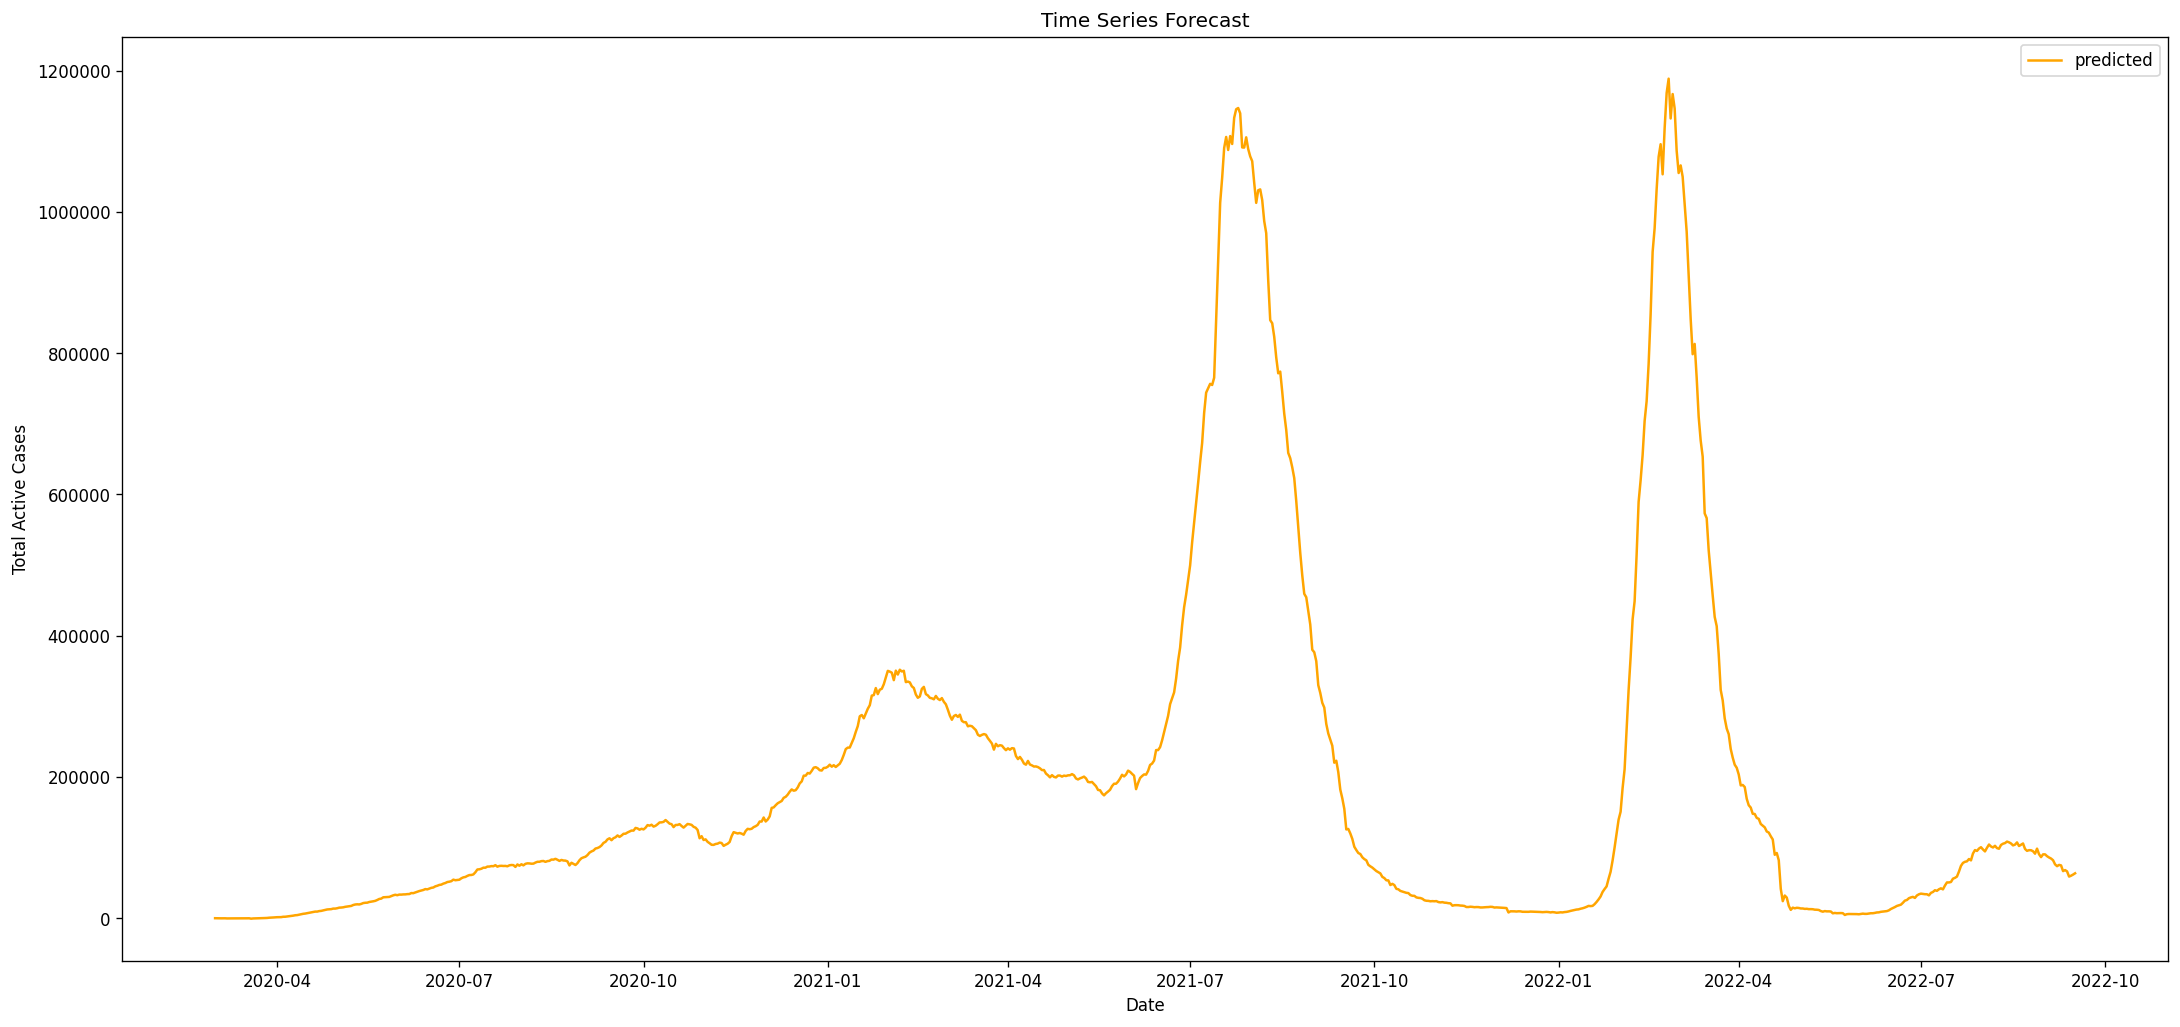

In [ ]:
# visualization predicted
plt.figure(figsize=(22,10))
plt.ticklabel_format(style='plain')
#plt.plot(data_tes["Date"], data_tes["Total Active Cases"],label = "original")
plt.plot(forecast2,label = "predicted", color = 'orange')
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.legend()
plt.show()